# Main

## Define variables and import the main library

In [1]:
project_dir = '/data/BIDS-HPC/private/projects/dmi2'
links_dir = '/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links'
checkout_dir = '/data/BIDS-HPC/private/projects/dmi2/checkout'
annotation_file = '/data/BIDS-HPC/private/projects/dmi2/data/gencode.v22.annotation.gtf'
sample_sheet_file = '/data/BIDS-HPC/private/projects/dmi2/data/gdc_sample_sheet.2020-07-02.tsv'
metadata_file = '/data/BIDS-HPC/private/projects/dmi2/data/metadata.cart.2020-07-02.json'
import sys
if checkout_dir not in sys.path:
    sys.path.append(checkout_dir)
import target_class_lib as tc

## Prepare the annotation dataframe df_gencode_genes, particularly calculating the exon length of each gene (corresponding to its non-overlapping exons) and adding this as a column to the df_gencode_genes dataframe

In [2]:
# This takes about 10 minutes if the pickle file doesn't already exist
df_gencode_genes = tc.calculate_exon_lengths(annotation_file, project_dir)

Reading pickle file /data/BIDS-HPC/private/projects/dmi2/data/annotation_dataframe.pkl...


## Obtain a Pandas dataframe from the fields of interest for all samples, essentially containing everything we'll ever need to know about the samples, including the labels themselves

In [3]:
df_samples = tc.get_labels_dataframe(sample_sheet_file, metadata_file)

## Read in and, if possible, confirm the counts and FPKM normalizations for all the samples in the samples dataframe df_samples
### Then, convert the lists of Pandas series to Pandas dataframes

In [4]:
srs_counts, srs_fpkm, srs_fpkm_uq, counts_fn_holder = tc.get_intensities(df_samples, links_dir, df_gencode_genes, project_dir)
intensities = tc.make_intensities_dataframes([srs_counts, srs_fpkm, srs_fpkm_uq], df_samples.index)

Reading pickle file /data/BIDS-HPC/private/projects/dmi2/data/series_lists.pkl...


## Return the samples dataframe with the samples removed that correspond to multiple cases (i.e., people)
### Further, remove those samples from the data itself

In [5]:
df_samples, indexes_to_keep, df_to_drop = tc.drop_multiperson_samples(df_samples)
for idf, df in enumerate(intensities):
    intensities[idf] = df.iloc[indexes_to_keep,:]

Dropping the following samples from the samples table:
                                            file list index  \
sample id                                                     
TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A             3075   
TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A             1900   
TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A             1660   
TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A             3653   

                                                                             counts file name  \
sample id                                                                                       
TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A  d5589fcc-c841-43d5-ae2a-ce5ee0914c7e.htseq_cou...   
TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A  71edd401-29be-401e-b2de-f5fdca3964d2.htseq_cou...   
TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A  34253522-71e6-480e-a832-95491686d146.htseq_cou...   
TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A  fa6a16c4-9eb9-4f04-a784-1a84f57cb479.

## Perform exploratory data analysis on the sample labels

Non-numeric columns with all unique values (1317 of them), with sample values:

 . counts file name        d56268c4-cc38-48be-8fe5-729bb7207d84.htseq_counts.txt.gz
 . file id                 f36c52a5-3558-4da2-9207-46b810d94f84
 . entity_submitter_id     TARGET-40-PANGRW-01A-01R
 . sample id               TARGET-40-PANGRW-01A

Non-numeric columns with uniform values:

 . contamination_error     None
 . contamination           None
 . state                   released
 . platform                Illumina

Non-numeric columns with non-unique and non-uniform values:

 . project id              9 

TARGET-ALL-P2    519
TARGET-AML       187
TARGET-NBL       157
TARGET-WT        136
TARGET-ALL-P3    135
TARGET-OS         88
TARGET-RT         70
TARGET-CCSK       13
TARGET-ALL-P1     12
Name: project id, dtype: int64 

 . case id                 1188 

TARGET-15-SJMPAL042946    3
TARGET-30-PATYIL          2
TARGET-52-PAUDPV          2
TARGET-20-PARYFN          2
TARGET-30-PARBAJ          2
    

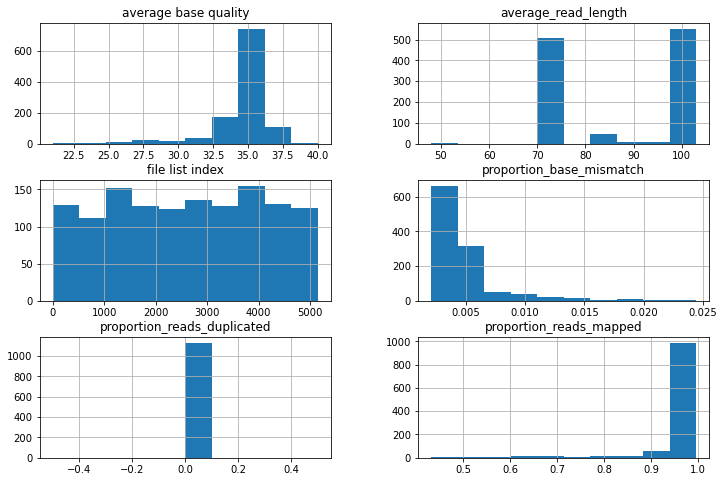

In [6]:
tc.eda_labels(df_samples)

## Plot histograms of the numerical columns of the samples/labels before and after cutoffs are applied, and print out a summary of what was done
### Further, remove those samples from the data itself

There are 64 bad values in the "average base quality" plot
There are 61 bad values in the "proportion_base_mismatch" plot
There are 54 bad values in the "proportion_reads_mapped" plot
Most bad values are overlapping; taken together, there are 89 bad values
We should likely use these cutoffs to remove the bad samples; this will only remove 6.8% of the data, leaving 1228 good samples
See for example the two generated images: the first is the original data with the cutoffs plotted in red, and the second is the filtered data with the cutoffs applied


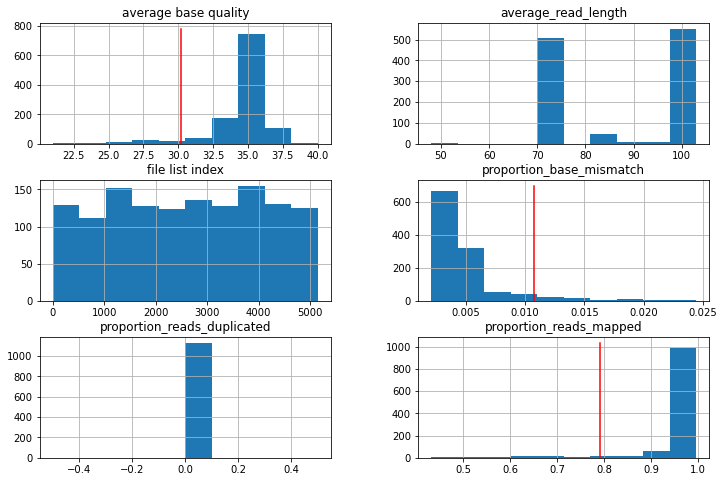

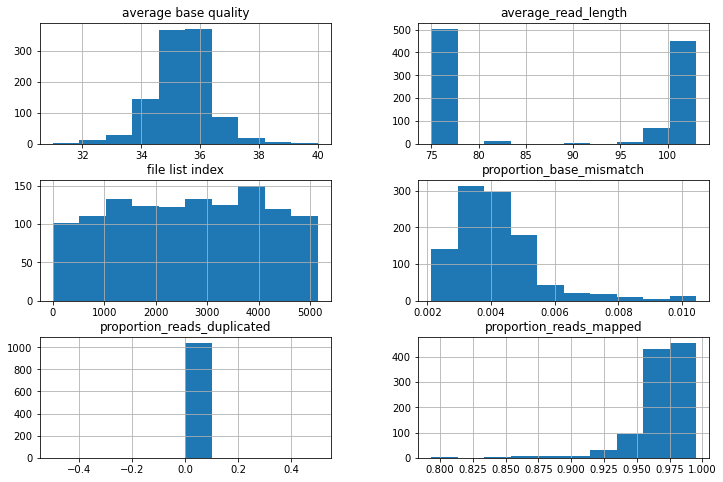

In [7]:
df_samples, indexes_to_keep = tc.remove_bad_samples(df_samples)
for idf, df in enumerate(intensities):
    intensities[idf] = df.iloc[indexes_to_keep,:]

## Perform exploratory data analysis on the filtered sample labels

Non-numeric columns with all unique values (1228 of them), with sample values:

 . counts file name        305e4870-0f71-4f85-a0fa-6416711c8254.htseq_counts.txt.gz
 . file id                 7fb2686c-c70b-4b22-b440-dd24e9a281cc
 . entity_submitter_id     TARGET-30-PALCBW-01A-01R
 . sample id               TARGET-30-PALCBW-01A

Non-numeric columns with uniform values:

 . contamination_error     None
 . contamination           None
 . state                   released
 . platform                Illumina

Non-numeric columns with non-unique and non-uniform values:

 . project id              9 

TARGET-ALL-P2    518
TARGET-AML       187
TARGET-NBL       143
TARGET-WT        136
TARGET-ALL-P3    135
TARGET-RT         69
TARGET-OS         24
TARGET-CCSK       13
TARGET-ALL-P1      3
Name: project id, dtype: int64 

 . case id                 1099 

TARGET-15-SJMPAL042946    3
TARGET-30-PATYIL          2
TARGET-10-PARXMC          2
TARGET-20-PASYJI          2
TARGET-15-SJMPAL040025    2
    

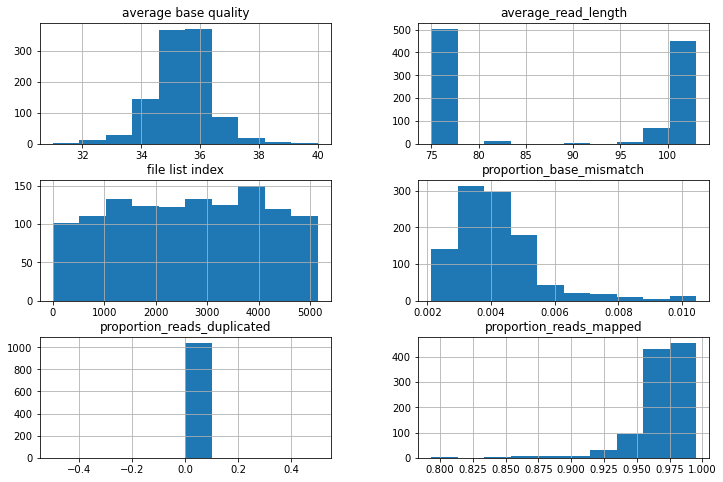

In [8]:
tc.eda_labels(df_samples)

## Print some random data for us to spot-check in the files themselves to manually ensure we have a handle on the data arrays

In [5]:
tc.spot_check_data(intensities)

Sample TARGET-15-SJMPAL011911-03A should have a counts value of 14 for gene ENSG00000214629.3
Sample TARGET-10-PANRYM-09A should have a counts value of 2502 for gene ENSG00000101888.10
Sample TARGET-10-PANCVR-03A should have a counts value of 2 for gene ENSG00000167769.4
Sample TARGET-10-PASTPT-09A should have a counts value of 6 for gene ENSG00000200170.1
Sample TARGET-30-PANBSP-01A should have a counts value of 121 for gene ENSG00000231367.4
Sample TARGET-30-PANZVU-01A should have a FPKM value of 0.45793028149178133 for gene ENSG00000175928.5
Sample TARGET-10-PATKYI-09A should have a FPKM value of 0.2748913468585777 for gene ENSG00000232445.1
Sample TARGET-15-SJMPAL043506-04B should have a FPKM value of 1.496078752388438 for gene ENSG00000163093.10
Sample TARGET-15-SJMPAL042798-09B should have a FPKM value of 0.039262667013378896 for gene ENSG00000146147.13
Sample TARGET-10-PANUSN-04A should have a FPKM value of 0.8834060047848237 for gene ENSG00000280783.1
Sample TARGET-10-PANUHA-09

# Scratch

In [7]:
df_samples = df_samples.sort_index()

In [9]:
for name in df_samples.index[:100]:
    print(name)

TARGET-10-DCC002-09A
TARGET-10-PAKHZT-03A
TARGET-10-PAKKCA-03A
TARGET-10-PAKKXB-03A
TARGET-10-PAKSWW-03A
TARGET-10-PAKSWW-04A
TARGET-10-PAKTAL-03A
TARGET-10-PAKVKK-03A
TARGET-10-PAKYEP-03A
TARGET-10-PALJDL-09A
TARGET-10-PAMDRM-09A
TARGET-10-PAMXHJ-09A
TARGET-10-PAMXSP-09A
TARGET-10-PANATY-09B
TARGET-10-PANCVR-03A
TARGET-10-PANCVR-04A
TARGET-10-PANDBX-09B
TARGET-10-PANDWE-03A
TARGET-10-PANEHF-09A
TARGET-10-PANEUH-09A
TARGET-10-PANFNZ-03A
TARGET-10-PANGIF-03A
TARGET-10-PANIEU-03A
TARGET-10-PANJPG-09A
TARGET-10-PANJWJ-09A
TARGET-10-PANKAK-04A
TARGET-10-PANKAK-09A
TARGET-10-PANKDT-03A
TARGET-10-PANKGK-09A
TARGET-10-PANKMB-09A
TARGET-10-PANKRG-03A
TARGET-10-PANLGK-03B
TARGET-10-PANLIC-09A
TARGET-10-PANNGL-09A
TARGET-10-PANPJI-09A
TARGET-10-PANRDC-03A
TARGET-10-PANRWG-09A
TARGET-10-PANRYM-09A
TARGET-10-PANSBK-03B
TARGET-10-PANSBR-09A
TARGET-10-PANSDA-04A
TARGET-10-PANSDA-09A
TARGET-10-PANSFD-09A
TARGET-10-PANSHK-04A
TARGET-10-PANSHK-09A
TARGET-10-PANSIA-09A
TARGET-10-PANSPW-09A
TARGET-10-PAN

In [6]:
# Strip the ".gz" off of the filenames in the "counts file name" column of the samples dataframe
counts_filenames = [ x.split(sep='.gz')[0] for x in df_samples['counts file name'] ]

# For every counts filename in the samples dataframe...
for isample, counts_fn in enumerate(counts_filenames):
    print(counts_fn)
    if isample == 10:
        break

print(df_samples.index[:10])

# The above seems to be different from df_samples.index (seems fine though!), unless I did something weird in make_intensities_dataframes(), below:

# import pandas as pd
# counts_list = []
# for srs in srs_list:
#     counts_list.append(pd.DataFrame(srs, index=index))
# return(counts_list)

#df_samples.iloc[0,:]

b28185b9-4b67-447b-aba0-c78480a40db9.htseq_counts.txt
75274729-6545-4441-9fe1-00235e15aa18.htseq_counts.txt
d1e69dfd-5211-4c24-a86a-3cd52257deb1.htseq.counts
0d341ba4-980d-40c1-8f57-40ad4dd87e56.htseq.counts
b188181b-e6a9-4df8-830a-49231376daa9.htseq.counts
ce3f34fd-214b-4eb7-a3a2-e73dfda54c2c.htseq_counts.txt
12816ff1-8745-45b1-a651-0e76431ed3c1.htseq_counts.txt
c26a027b-ce26-4bb0-a621-3f29ee990f3a.htseq_counts.txt
a6cb277d-c121-4938-a6fd-0f2843c6a9d9.htseq_counts.txt
54e3458b-5866-485a-98df-113549baba61.htseq_counts.txt
781a79f5-89e2-4ae3-9ad4-e040832beebd.htseq.counts
Index(['TARGET-10-PARIAD-04A', 'TARGET-10-PARTPW-09A', 'TARGET-20-PARLVL-04A',
       'TARGET-20-PARHVK-09A', 'TARGET-20-PARUBT-40A', 'TARGET-10-PATLGU-09A',
       'TARGET-10-PATJZK-09A', 'TARGET-10-PASVPZ-09A', 'TARGET-50-PAKMUB-01A',
       'TARGET-10-PASKAD-09A'],
      dtype='object', name='sample id')


In [ ]:
import pandas as pd
df_samples = pd.read_csv('gdc_sample_sheet.2020-07-02.tsv', sep='\t')
sample_is_htseq = df_samples['File Name'].apply(lambda x: 'htseq' in x.lower())
sample_has_multiple_cases = df_samples['Case ID'].apply(lambda x: len(x.split())>1)
print(df_samples[sample_is_htseq & sample_has_multiple_cases])

In [18]:
import pandas as pd
df_samples = pd.read_csv('/data/BIDS-HPC/private/projects/dmi2/data/gdc_sample_sheet.2020-07-02.tsv', sep='\t')
sample_is_htseq = df_samples['File Name'].apply(lambda x: 'htseq' in x.lower())
sample_has_multiple_cases = df_samples['Case ID'].apply(lambda x: len(x.split())>1)
df_samples[sample_is_htseq & sample_has_multiple_cases]

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
1660,5ad6072e-b35b-4e62-937d-6c7ab706a346,34253522-71e6-480e-a832-95491686d146.htseq_cou...,Transcriptome Profiling,Gene Expression Quantification,"TARGET-NBL, TARGET-NBL","TARGET-30-PASYPX, TARGET-30-PAIXIF","TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A","Primary Tumor, Primary Tumor"
1900,d9de5328-2f5d-4915-b322-2b4aa7c5391a,71edd401-29be-401e-b2de-f5fdca3964d2.htseq_cou...,Transcriptome Profiling,Gene Expression Quantification,"TARGET-NBL, TARGET-NBL","TARGET-30-PANKFE, TARGET-30-PAPUAR","TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A","Primary Tumor, Primary Tumor"
3075,936e9a45-d879-4500-9571-7024e5dc053a,d5589fcc-c841-43d5-ae2a-ce5ee0914c7e.htseq_cou...,Transcriptome Profiling,Gene Expression Quantification,"TARGET-NBL, TARGET-NBL","TARGET-30-PANUKV, TARGET-30-PASUML","TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A","Primary Tumor, Primary Tumor"
3653,99b36164-ff85-4a6b-85de-77bd42aff592,fa6a16c4-9eb9-4f04-a784-1a84f57cb479.htseq_cou...,Transcriptome Profiling,Gene Expression Quantification,"TARGET-NBL, TARGET-NBL","TARGET-30-PAPEAV, TARGET-30-PAPTFZ","TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A","Primary Tumor, Primary Tumor"


In [7]:
# Import relevant library
import random

# Constants
intensity_types = ['counts', 'FPKM', 'FPKM-UQ']
nsamples = 5

# Get some values from the intensity data
nsamples_tot = intensities[0].shape[0]
sample_names = intensities[0].index

# For each intensity type...
for iintensity, intensity_type in enumerate(intensity_types):

    # For each of nsamples random samples in the data...
    for sample_index in random.sample(range(nsamples_tot), k=nsamples):

        # Store the current sample name
        sample_name = sample_names[sample_index]

        # Get the non-zero intensities for the current sample
        srs = intensities[iintensity].iloc[sample_index,:]
        srs2 = srs[srs!=0]

        # Get a random index of the non-zero intensities and store the corresponding intensity and gene
        srs2_index = random.randrange(len(srs2))
        intensity = srs2[srs2_index]
        gene = srs2.index[srs2_index]

        print(sample_index, srs2_index)

        # Print what we should see in the files
        print('Sample {} should have a {} value of {} for gene {}'.format(sample_name, intensity_type, intensity, gene))

732 30127
Sample TARGET-10-PARUAT-09B should have a counts value of 17 for gene ENSG00000242741.1
1267 26455
Sample TARGET-52-PARUGK-01A should have a counts value of 1 for gene ENSG00000252452.1
941 30403
Sample TARGET-52-PAUHAZ-01A should have a counts value of 2 for gene ENSG00000267583.4
341 6664
Sample TARGET-10-PATCKV-09A should have a counts value of 15390 for gene ENSG00000134909.17
66 18347
Sample TARGET-10-PARMKM-03A should have a counts value of 1 for gene ENSG00000220494.4
719 20987
Sample TARGET-15-SJMPAL044953-09A should have a FPKM value of 0.4798930428486229 for gene ENSG00000229605.5
1305 24368
Sample TARGET-30-PAISNS-01A should have a FPKM value of 0.6039131338687702 for gene ENSG00000259933.5
51 28996
Sample TARGET-10-PAPKNJ-09B should have a FPKM value of 0.11045521986751287 for gene ENSG00000271270.4
1263 13844
Sample TARGET-10-PAPLUG-09A should have a FPKM value of 0.3611128858846485 for gene ENSG00000181031.14
332 11937
Sample TARGET-10-PANKRG-03A should have a F

In [8]:
# Import relevant library
import random

# Constants
intensity_types = ['counts', 'FPKM', 'FPKM-UQ']
nsamples = 5

# Get some values from the intensity data
nsamples_tot = intensities[0].shape[0]
sample_names = intensities[0].index

# For each intensity type...
for iintensity, intensity_type in enumerate(intensity_types):

    # For each of nsamples random samples in the data...
    for sample_index in random.sample(range(nsamples_tot), k=nsamples):

        # Store the current sample name
        sample_name = sample_names[sample_index]

        # Get the non-zero intensities for the current sample
        srs = intensities[iintensity].iloc[sample_index,:]
        srs2 = srs[srs!=0]

        # Get a random index of the non-zero intensities and store the corresponding intensity and gene
        srs2_index = random.randrange(len(srs2))
        intensity = srs2[srs2_index]
        gene = srs2.index[srs2_index]

        print(sample_index, srs2_index)

        # Print what we should see in the files
        print('Sample {} should have a {} value of {} for gene {}'.format(sample_name, intensity_type, intensity, gene))

904 15575
Sample TARGET-10-PATJLT-09A should have a counts value of 1 for gene ENSG00000201176.1
697 262
Sample TARGET-10-PANSDA-09A should have a counts value of 813 for gene ENSG00000011426.9
814 26982
Sample TARGET-10-PATBGC-09A should have a counts value of 2 for gene ENSG00000240671.2
1251 11773
Sample TARGET-30-PARSBI-01A should have a counts value of 793 for gene ENSG00000175040.5
763 4197
Sample TARGET-10-PATEVE-09B should have a counts value of 511 for gene ENSG00000114923.15
1216 27978
Sample TARGET-20-PANDIX-09A should have a FPKM value of 7.307952152487021 for gene ENSG00000249617.1
1249 5689
Sample TARGET-10-PANLGK-03B should have a FPKM value of 1.2179437578467396 for gene ENSG00000130383.7
865 11241
Sample TARGET-10-PARSZH-09A should have a FPKM value of 0.716402751923072 for gene ENSG00000182831.10
1137 12228
Sample TARGET-40-PATUXZ-01A should have a FPKM value of 3.6665381140246 for gene ENSG00000174915.10
857 31363
Sample TARGET-20-PARKCX-09A should have a FPKM value 

In [18]:
# print(counts_fn_holder[697])
# print(df_samples.iloc[697,:]['counts file name'])
# intensities[0].iloc[697,:]
#
print(counts_fn_holder[0])
#intensities[0]
srs_counts[0]

1e8939fe-6847-4e2e-abe4-980ebc0919a8.htseq_counts.txt


id
ENSG00000000003.13     21
ENSG00000000005.5       0
ENSG00000000419.11    600
ENSG00000000457.12    541
ENSG00000000460.15    755
                     ... 
ENSGR0000275287.3       0
ENSGR0000276543.3       0
ENSGR0000277120.3       0
ENSGR0000280767.1       0
ENSGR0000281849.1       0
Name: intensity, Length: 60483, dtype: int64

In [17]:
srs_fpkm_uq[128]['ENSG00000213109.4']

1769.8938837998296

In [29]:
#df_samples.iloc[128,:]
#df_samples.index.to_list().index('TARGET-10-PASHUP-09A') # TARGET-52-PARRCL-11A
print(df_samples.index.to_list().index('TARGET-52-PARRCL-11A'))
srs_counts[128]
df_samples.iloc[128,:]

866


file list index                                                             1986
counts file name               8680dc69-6541-4cd3-a12a-f0498d41b811.htseq_cou...
average base quality                                                          34
file id                                     0b245f6d-6048-4bad-805a-39d677cc4f8c
project id                                                         TARGET-ALL-P2
case id                                                         TARGET-10-PASHUP
sample type                           Primary Blood Derived Cancer - Bone Marrow
contamination_error                                                         None
proportion_reads_mapped                                                 0.963077
proportion_reads_duplicated                                                    0
contamination                                                               None
proportion_base_mismatch                                              0.00533957
state                       

In [30]:
import pandas as pd
df_sample_sheet = pd.read_csv(sample_sheet_file, sep='\t')

In [35]:
list(set(df_sample_sheet['Sample ID']))[866]

'TARGET-52-PARRCL-11A'

In [15]:
for isrs in range(1320):
    if not srs_counts[isrs].index.equals(srs_counts[isrs+1].index):
        print('uh oh')

In [37]:
intensities[0].index

Index(['TARGET-10-PATHBG-09A', 'TARGET-10-PATXNR-09A', 'TARGET-30-PASPER-01A',
       'TARGET-30-PASWFB-01A', 'TARGET-10-PASHUI-04A',
       'TARGET-15-SJMPAL017978-09A', 'TARGET-10-PARUAT-09B',
       'TARGET-20-SJAML045740-09A', 'TARGET-15-SJMPAL040036-03A',
       'TARGET-15-PAREAT-09B',
       ...
       'TARGET-10-PARTKL-09A', 'TARGET-10-PANXDR-09A', 'TARGET-30-PATGJU-01A',
       'TARGET-10-PATCTI-04A', 'TARGET-50-PAJNGH-01A', 'TARGET-50-PAJMEN-01A',
       'TARGET-10-PARXHT-03A', 'TARGET-10-PATKWU-09A', 'TARGET-10-PAPDUF-09A',
       'TARGET-10-PARSLL-09B'],
      dtype='object', name='sample id', length=1228)

In [35]:
import random
intensity_types = ['counts', 'FPKM', 'FPKM-UQ']
#print(len(df_samples))
for iintensity, intensity_type in enumerate(intensity_types):
    for sample_index in random.sample(range(len(df_samples)), k=5):
        sample = df_samples.index[sample_index]
        srs = intensities[iintensity].iloc[sample_index,:]
        srs2 = srs[srs!=0]
        srs2_index = random.randrange(len(srs2))
        intensity = srs2[srs2_index]
        gene = srs2.index[srs2_index]
        print('Sample {} should have a {} value of {} for gene {}'.format(sample, intensity_type, intensity, gene))

Sample TARGET-52-PASADZ-01A should have a counts value of 5 for gene ENSG00000262006.1
Sample TARGET-52-PAVVIT-01A should have a counts value of 66 for gene ENSG00000233799.1
Sample TARGET-30-PASJZC-01A should have a counts value of 2 for gene ENSG00000242899.1
Sample TARGET-50-PAJMXF-01A should have a counts value of 13113 for gene ENSG00000134779.13
Sample TARGET-50-CAAAAR-01A should have a counts value of 138 for gene ENSG00000106133.16
Sample TARGET-50-PAKXWB-01A should have a FPKM value of 0.024508927673340494 for gene ENSG00000173166.16
Sample TARGET-10-PAPCVZ-04A should have a FPKM value of 0.09850761010100029 for gene ENSG00000232342.6
Sample TARGET-20-PASYJI-09A should have a FPKM value of 0.3033338504277615 for gene ENSG00000230228.2
Sample TARGET-20-PARKCX-09A should have a FPKM value of 0.05498894092993869 for gene ENSG00000232496.2
Sample TARGET-30-PARBGP-01A should have a FPKM value of 1.0411119492062302 for gene ENSG00000211909.1
Sample TARGET-30-PASZPI-01A should have a

In [60]:
import numpy as np
#c = np.array([[0,10,4], [2,6,12], [33,55,200]])
c = np.array([[25,50], [50,0], [25,50]])

ngenes, nsamples = c.shape

gene_always_expressed = []
for igene in range(ngenes):
    gene_always_expressed.append(0 not in c[igene,:])

c2 = np.log(c[gene_always_expressed,:])

ans = c / np.exp(np.median(c2 - c2.mean(axis=1, keepdims=True), axis=0, keepdims=True))


In [61]:
ans / 35.35533906 * 25

array([[25., 25.],
       [50.,  0.],
       [25., 25.]])

In [14]:
intensities[2].index.equals(df_samples.index)

True

In [6]:
df_to_drop

,file list index,counts file name,average base quality,file id,project id,case id,sample type,contamination_error,proportion_reads_mapped,proportion_reads_duplicated,contamination,proportion_base_mismatch,state,platform,average_read_length,entity_submitter_id
sample id,,,,,,,,,,,,,,,,
"TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A",1900,71edd401-29be-401e-b2de-f5fdca3964d2.htseq_cou...,35.0,d9de5328-2f5d-4915-b322-2b4aa7c5391a,"TARGET-NBL, TARGET-NBL","TARGET-30-PANKFE, TARGET-30-PAPUAR","Primary Tumor, Primary Tumor",None,0.985460,0.0,None,0.003681,released,Illumina,101.0,TARGET-30-PANKFE-01A-01R
"TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A",1660,34253522-71e6-480e-a832-95491686d146.htseq_cou...,31.0,5ad6072e-b35b-4e62-937d-6c7ab706a346,"TARGET-NBL, TARGET-NBL","TARGET-30-PASYPX, TARGET-30-PAIXIF","Primary Tumor, Primary Tumor",None,0.920981,0.0,None,0.011965,released,Illumina,103.0,TARGET-30-PAIXIF-01A-01R
"TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A",3075,d5589fcc-c841-43d5-ae2a-ce5ee0914c7e.htseq_cou...,33.0,936e9a45-d879-4500-9571-7024e5dc053a,"TARGET-NBL, TARGET-NBL","TARGET-30-PANUKV, TARGET-30-PASUML","Primary Tumor, Primary Tumor",None,0.951929,0.0,None,0.007599,released,Illumina,100.0,TARGET-30-PANUKV-01A-01R
"TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A",3653,fa6a16c4-9eb9-4f04-a784-1a84f57cb479.htseq_cou...,36.0,99b36164-ff85-4a6b-85de-77bd42aff592,"TARGET-NBL, TARGET-NBL","TARGET-30-PAPEAV, TARGET-30-PAPTFZ","Primary Tumor, Primary Tumor",None,0.994043,0.0,None,0.003493,released,Illumina,101.0,TARGET-30-PAPTFZ-01A-01R


In [7]:
sum(indexes_to_keep)

1317

In [11]:
intensities[1]

id,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000263980.4,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1
sample id,,,,,,,,,,,,,,,,,,,,,
TARGET-10-PATHGY-09A,0.111255,0.000000,29.075152,2.630751,5.148485,2.307603,23.298208,9.674556,7.604532,13.989317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TARGET-10-PATPGE-09A,0.000000,0.000000,37.730998,1.136165,1.321592,40.821970,0.008068,16.493750,3.657370,6.345724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TARGET-52-PASILR-01A,0.210563,0.000000,17.610747,1.212533,0.256049,41.230760,0.295440,8.465246,2.958477,4.630447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TARGET-10-PARDWE-03A,2.737457,0.059543,34.032859,1.330088,2.948050,4.111605,0.041194,0.703619,3.794682,10.652937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TARGET-30-PAISNS-01A,0.017165,0.009670,22.844026,3.234593,1.868178,9.949116,0.189237,1.577527,3.129258,14.882695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARGET-10-PARJPL-09A,10.282216,0.068429,17.639215,4.991945,1.970965,0.891928,1.257937,11.922365,2.868831,5.550464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TARGET-52-PADWRZ-01A,0.032334,0.000000,27.010243,2.357601,6.577630,24.227760,0.138021,0.647501,3.442166,30.126869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TARGET-15-SJMPAL016343-09A,10.108918,0.032682,25.448302,2.608760,2.788776,0.416526,0.930273,7.135442,5.291081,13.679314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
files_per_sample = tc.get_files_per_sample(links_dir)

In [4]:
srs_counts, srs_fpkm, srs_fpkm_uq = tc.get_intensities(files_per_sample, links_dir, df_gencode_genes, project_dir)

Reading pickle file /data/BIDS-HPC/private/projects/dmi2/data/series_lists.pkl...


In [6]:
df_samples

,file list index,counts file name,average base quality,file id,project id,case id,sample type,contamination_error,proportion_reads_mapped,proportion_reads_duplicated,contamination,proportion_base_mismatch,state,platform,average_read_length,entity_submitter_id
sample id,,,,,,,,,,,,,,,,
TARGET-10-PAPBSY-09A,2740,63c43d0e-c7d5-4dec-97c4-fed3117fbbff.htseq_cou...,36.0,88846143-e3f5-45c5-9b02-dadc432bb197,TARGET-ALL-P2,TARGET-10-PAPBSY,Primary Blood Derived Cancer - Bone Marrow,None,0.977876,0.0,None,0.003684,released,Illumina,75.0,TARGET-10-PAPBSY-09A-01R
TARGET-20-PAMYAS-04A,3896,7c2f9175-44b3-4461-a480-b7093c4dce27.htseq.cou...,NaN,8bb94cb0-c63b-400a-9f0d-e73b71754356,TARGET-AML,TARGET-20-PAMYAS,Recurrent Blood Derived Cancer - Bone Marrow,None,NaN,NaN,None,NaN,released,Illumina,NaN,TARGET-20-PAMYAS-04A-03R
TARGET-20-PASVYA-04A,3878,b257fdcb-d2dd-45d3-98aa-580c07a9571d.htseq.cou...,NaN,bdd8e266-ab4c-408a-a56d-3420ad0b5120,TARGET-AML,TARGET-20-PASVYA,Recurrent Blood Derived Cancer - Bone Marrow,None,NaN,NaN,None,NaN,released,Illumina,NaN,TARGET-20-PASVYA-04A-01R
TARGET-15-SJMPAL043506-04B,455,925a2b51-2019-4d0b-92d8-e4cdf3612b44.htseq_cou...,35.0,28581c07-b686-4686-9c84-cb0e649f17b9,TARGET-ALL-P3,TARGET-15-SJMPAL043506,Recurrent Blood Derived Cancer - Bone Marrow,None,0.950136,0.0,None,0.004431,released,Illumina,75.0,TARGET-15-SJMPAL043506-04B-01R
TARGET-10-PARFWD-03B,66,d990b210-ae44-4c6a-bdd8-54ee771ed0cb.htseq_cou...,34.0,7562976c-b9b3-4cb2-bb85-a15da1175b32,TARGET-ALL-P2,TARGET-10-PARFWD,Primary Blood Derived Cancer - Peripheral Blood,None,0.955762,0.0,None,0.006132,released,Illumina,75.0,TARGET-10-PARFWD-03B-01R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARGET-15-SJMPAL046467-09A,2812,72b7fd78-9a20-4354-900d-39ab07d311a4.htseq_cou...,34.0,00dc8590-8524-4939-a048-557dd6e45dcb,TARGET-ALL-P3,TARGET-15-SJMPAL046467,Primary Blood Derived Cancer - Bone Marrow,None,0.945517,0.0,None,0.005222,released,Illumina,99.0,TARGET-15-SJMPAL046467-09A-01R
TARGET-20-PAKIYW-09A,3957,f0b274aa-7a53-428f-bd60-66802a91a9fa.htseq.cou...,NaN,e3372d29-44e9-46a1-a601-52e86cda99ca,TARGET-AML,TARGET-20-PAKIYW,Primary Blood Derived Cancer - Bone Marrow,None,NaN,NaN,None,NaN,released,Illumina,NaN,TARGET-20-PAKIYW-09A-01R
TARGET-10-PANKDT-03A,1276,7c41a3ed-c3bb-47f6-aa7c-d40114d35bd2.htseq_cou...,36.0,95ea8310-6f9b-4d7f-a552-32b547cb0cd6,TARGET-ALL-P2,TARGET-10-PANKDT,Primary Blood Derived Cancer - Peripheral Blood,None,0.976326,0.0,None,0.003378,released,Illumina,75.0,TARGET-10-PANKDT-03A-01R


In [27]:
df_samples[df_samples['case id'] == 'TARGET-15-SJMPAL042946']

,file list index,counts file name,average base quality,file id,project id,case id,sample type,contamination_error,proportion_reads_mapped,proportion_reads_duplicated,contamination,proportion_base_mismatch,state,platform,average_read_length,entity_submitter_id
sample id,,,,,,,,,,,,,,,,
TARGET-15-SJMPAL042946-09B,2138,7d9fe80c-b457-476d-9f0e-5ec9fc1fb879.htseq_cou...,36.0,eb7d29ed-a00f-4776-8491-6a3502015761,TARGET-ALL-P3,TARGET-15-SJMPAL042946,Primary Blood Derived Cancer - Bone Marrow,None,0.960818,0.0,None,0.004447,released,Illumina,75.0,TARGET-15-SJMPAL042946-09B-01R
TARGET-15-SJMPAL042946-09A,4655,37290b7c-64b0-4a40-b541-12ece3338669.htseq_cou...,36.0,6a73d5ff-d14a-4e47-9fee-8d7566c107f5,TARGET-ALL-P3,TARGET-15-SJMPAL042946,Primary Blood Derived Cancer - Bone Marrow,None,0.979847,0.0,None,0.004606,released,Illumina,97.0,TARGET-15-SJMPAL042946-09A-01R
TARGET-15-SJMPAL042946-04B,2273,5bfe1b87-0acb-4033-99ee-bb0cef4df26b.htseq_cou...,36.0,f7bcb620-a10c-4fee-8d23-3e48ec9a8f07,TARGET-ALL-P3,TARGET-15-SJMPAL042946,Recurrent Blood Derived Cancer - Bone Marrow,None,0.961755,0.0,None,0.004555,released,Illumina,75.0,TARGET-15-SJMPAL042946-04B-01R


In [17]:
df_samples['case id'].value_counts()

TARGET-15-SJMPAL042946    3
TARGET-15-SJMPAL040039    2
TARGET-50-CAAAAR          2
TARGET-52-PARPFY          2
TARGET-10-PARAKF          2
                         ..
TARGET-10-PATPGE          1
TARGET-40-PAMHLF          1
TARGET-10-PANWVW          1
TARGET-20-PAEFGR          1
TARGET-20-SJAML045735     1
Name: case id, Length: 1188, dtype: int64

In [10]:
[ fn for fn in df_samples_to_drop['counts file name'] ]

['fa6a16c4-9eb9-4f04-a784-1a84f57cb479.htseq_counts.txt.gz',
 'd5589fcc-c841-43d5-ae2a-ce5ee0914c7e.htseq_counts.txt.gz',
 '34253522-71e6-480e-a832-95491686d146.htseq_counts.txt.gz',
 '71edd401-29be-401e-b2de-f5fdca3964d2.htseq_counts.txt.gz']

In [39]:
import pandas as pd
indexes_to_drop = []
samples_to_drop = []
for sample_index in df_samples.index:
    sample = df_samples.loc[sample_index]
    if len(sample['case id'].split()) > 1: # if there are multiple cases (people; and I've confirmed that they can't be the same people, e.g., living white female and dead black male) corresponding to this one sample...
        #print(sample)
        indexes_to_drop.append(sample_index)
        samples_to_drop.append(sample)
df_samples_to_drop = pd.DataFrame(data=samples_to_drop).rename_axis(index='sample id')
print(indexes_to_drop)
df_samples = df_samples.drop(index=indexes_to_drop)

['TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A', 'TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A', 'TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A', 'TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A']


In [40]:
df_samples_to_drop

,file list index,counts file name,average base quality,file id,project id,case id,sample type,contamination_error,proportion_reads_mapped,proportion_reads_duplicated,contamination,proportion_base_mismatch,state,platform,average_read_length,entity_submitter_id
sample id,,,,,,,,,,,,,,,,
"TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A",1660,34253522-71e6-480e-a832-95491686d146.htseq_cou...,31.0,5ad6072e-b35b-4e62-937d-6c7ab706a346,"TARGET-NBL, TARGET-NBL","TARGET-30-PASYPX, TARGET-30-PAIXIF","Primary Tumor, Primary Tumor",None,0.920981,0.0,None,0.011965,released,Illumina,103.0,TARGET-30-PAIXIF-01A-01R
"TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A",3653,fa6a16c4-9eb9-4f04-a784-1a84f57cb479.htseq_cou...,36.0,99b36164-ff85-4a6b-85de-77bd42aff592,"TARGET-NBL, TARGET-NBL","TARGET-30-PAPEAV, TARGET-30-PAPTFZ","Primary Tumor, Primary Tumor",None,0.994043,0.0,None,0.003493,released,Illumina,101.0,TARGET-30-PAPTFZ-01A-01R
"TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A",1900,71edd401-29be-401e-b2de-f5fdca3964d2.htseq_cou...,35.0,d9de5328-2f5d-4915-b322-2b4aa7c5391a,"TARGET-NBL, TARGET-NBL","TARGET-30-PANKFE, TARGET-30-PAPUAR","Primary Tumor, Primary Tumor",None,0.985460,0.0,None,0.003681,released,Illumina,101.0,TARGET-30-PANKFE-01A-01R
"TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A",3075,d5589fcc-c841-43d5-ae2a-ce5ee0914c7e.htseq_cou...,33.0,936e9a45-d879-4500-9571-7024e5dc053a,"TARGET-NBL, TARGET-NBL","TARGET-30-PANUKV, TARGET-30-PASUML","Primary Tumor, Primary Tumor",None,0.951929,0.0,None,0.007599,released,Illumina,100.0,TARGET-30-PANUKV-01A-01R


In [17]:
'TARGET-30-PASYPX,TARGET-30-PAIXIF'.split()

['TARGET-30-PASYPX,TARGET-30-PAIXIF']

In [10]:
actual_names = ['PAIXIF', 'PAPTFZ', 'PANKFE', 'PANUKV']
for name in actual_names:
    for index in df_samples.index:
        if name in index:
            print(name, index)
# for index in df_samples.index:
#     if ' ' in index:
#         #print(index)
#         print(df_samples.loc[index])

PAIXIF TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A
PAPTFZ TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A
PAPTFZ TARGET-30-PAPTFZ-01A
PANKFE TARGET-30-PANKFE-01A
PANKFE TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A
PANUKV TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A


In [5]:
df_samples

,file list index,counts file name,average base quality,file id,project id,case id,sample type,contamination_error,proportion_reads_mapped,proportion_reads_duplicated,contamination,proportion_base_mismatch,state,platform,average_read_length,entity_submitter_id
sample id,,,,,,,,,,,,,,,,
TARGET-10-PANLGK-03B,2435,697e48e6-eb6c-464c-93dc-8b928256c4bc.htseq_cou...,35.0,e08b6486-0259-424e-b197-3c41e0080be8,TARGET-ALL-P2,TARGET-10-PANLGK,Primary Blood Derived Cancer - Peripheral Blood,None,0.955576,0.0,None,0.004694,released,Illumina,75.0,TARGET-10-PANLGK-03B-01R
TARGET-50-PALGVY-01A,3407,e71de575-9e42-4a12-bb07-c8659edb69c3.htseq_cou...,37.0,55896ead-9d27-47c0-a708-7f97d70c6d21,TARGET-WT,TARGET-50-PALGVY,Primary Tumor,None,0.979975,0.0,None,0.002364,released,Illumina,75.0,TARGET-50-PALGVY-01A-01R
TARGET-10-PAPLUG-09A,2159,18d61331-6d99-4be3-b15b-65791b6e86d6.htseq_cou...,36.0,e887a2fe-46f9-4870-b4d5-b884afd05fed,TARGET-ALL-P2,TARGET-10-PAPLUG,Primary Blood Derived Cancer - Bone Marrow,None,0.986042,0.0,None,0.003567,released,Illumina,75.0,TARGET-10-PAPLUG-09A-01R
TARGET-20-PARBFJ-09A,4230,9be341b6-cff3-4203-b26f-52c4a9995ff7.htseq.cou...,NaN,c6531605-f39b-4483-9a68-a3a2e55fe720,TARGET-AML,TARGET-20-PARBFJ,Primary Blood Derived Cancer - Bone Marrow,None,NaN,NaN,None,NaN,released,Illumina,NaN,TARGET-20-PARBFJ-09A-02R
TARGET-10-PAPJIB-04A,1096,56ce8e1a-ea6d-4121-84df-4c668c17fd60.htseq_cou...,36.0,c27c67bd-7a24-488f-985e-2358f2383c3b,TARGET-ALL-P2,TARGET-10-PAPJIB,Recurrent Blood Derived Cancer - Bone Marrow,None,0.942820,0.0,None,0.003051,released,Illumina,75.0,TARGET-10-PAPJIB-04A-01R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARGET-15-SJMPAL042946-09A,4655,37290b7c-64b0-4a40-b541-12ece3338669.htseq_cou...,36.0,6a73d5ff-d14a-4e47-9fee-8d7566c107f5,TARGET-ALL-P3,TARGET-15-SJMPAL042946,Primary Blood Derived Cancer - Bone Marrow,None,0.979847,0.0,None,0.004606,released,Illumina,97.0,TARGET-15-SJMPAL042946-09A-01R
TARGET-10-PASKAD-09A,1043,54e3458b-5866-485a-98df-113549baba61.htseq_cou...,35.0,06ff37c5-b35d-469b-b1a0-451572c00537,TARGET-ALL-P2,TARGET-10-PASKAD,Primary Blood Derived Cancer - Bone Marrow,None,0.963176,0.0,None,0.004353,released,Illumina,101.0,TARGET-10-PASKAD-09A-01R
TARGET-30-PAMNLH-01A,3753,fd140e4b-5d0e-44f9-9734-273a3d163a9b.htseq_cou...,36.0,25c8b2c2-6669-486e-9c7f-1e5a1951a363,TARGET-NBL,TARGET-30-PAMNLH,Primary Tumor,None,0.994740,0.0,None,0.003449,released,Illumina,101.0,TARGET-30-PAMNLH-01A-01R


In [9]:
for index in df_samples.index:
    if ' ' in index:
        #print(index)
        print(df_samples.loc[index])

file list index                                                             1660
counts file name               34253522-71e6-480e-a832-95491686d146.htseq_cou...
average base quality                                                          31
file id                                     5ad6072e-b35b-4e62-937d-6c7ab706a346
project id                                                TARGET-NBL, TARGET-NBL
case id                                       TARGET-30-PASYPX, TARGET-30-PAIXIF
sample type                                         Primary Tumor, Primary Tumor
contamination_error                                                         None
proportion_reads_mapped                                                 0.920981
proportion_reads_duplicated                                                    0
contamination                                                               None
proportion_base_mismatch                                               0.0119648
state                       

In [7]:
len(df_samples.index.unique())

1321

In [32]:
import numpy as np
print(np.full((len(df_samples),), True))

[ True  True  True ...  True  True  True]


There are 64 bad values in the "average base quality" plot
There are 61 bad values in the "proportion_base_mismatch" plot
There are 54 bad values in the "proportion_reads_mapped" plot
Most bad values are overlappling; taken together, there are 89 bad values
We should likely use these cutoffs to remove the bad samples; this will only remove 6.7% of the data, leaving 1232 good samples
See for example the two generated images: the first is the original data with the cutoffs plotted in red, and the second is the filtered data with the cutoffs applied
For the time being though, we are leaving the data untouched!


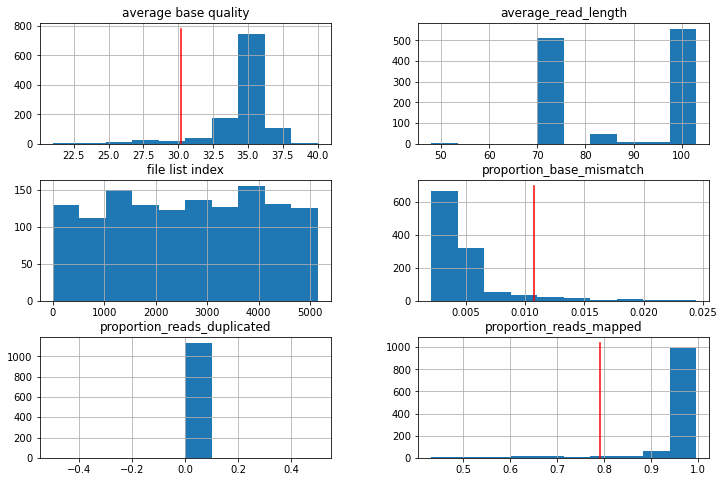

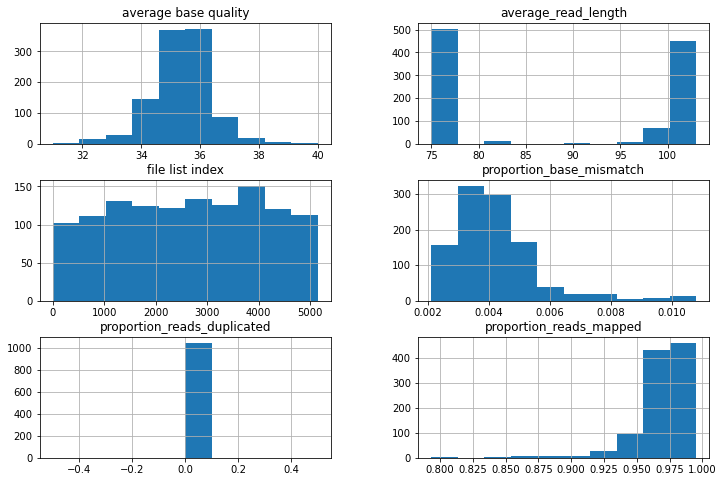

In [46]:
import numpy as np
# import matplotlib.pyplot as plt
# fig_all, ax_all = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
ax_hist = df_samples.hist(figsize=(12,8))
#ax_hist = df_samples.hist(ax=ax_all[0])
nstd = 2
# cutoffs = [
#     df_samples['average base quality'].mean() - nstd*df_samples['average base quality'].std(),
#     df_samples['proportion_base_mismatch'].mean() + nstd*df_samples['proportion_base_mismatch'].std(),
#     df_samples['proportion_reads_mapped'].mean() - nstd*df_samples['proportion_reads_mapped'].std()
# ]
columns = ['average base quality', 'proportion_base_mismatch', 'proportion_reads_mapped']
higher_is_better = [True, False, True]
sp_locs = [(0,0), (1,1), (2,1)]
valid_ind = np.full((len(df_samples),), True)
for col, hib, sp_loc in zip(columns, higher_is_better, sp_locs):
    sign = -2*int(hib) + 1
    vals = df_samples[col]
    cutoff = vals.mean() + sign*nstd*vals.std()
    ax = ax_hist[sp_loc]
    ylim = ax.get_ylim()
    ax.plot([cutoff,cutoff], ylim, 'r')

    bad_vals = (sign*vals) > (sign*cutoff)
    print('There are {} bad values in the "{}" plot'.format(sum(bad_vals), col))
    valid_ind[bad_vals]=False

ntot = len(valid_ind)
nbad_tot = ntot - sum(valid_ind)
print('Most bad values are overlappling; taken together, there are {} bad values'.format(nbad_tot))
print('We should likely use these cutoffs to remove the bad samples; this will only remove {:3.1f}% of the data, leaving {} good samples'.format(nbad_tot/ntot*100, ntot-nbad_tot))
print('See for example the two generated images: the first is the original data with the cutoffs plotted in red, and the second is the filtered data with the cutoffs applied')
print('For the time being though, we are leaving the data untouched!')

ax_hist2 = df_samples.iloc[valid_ind,:].hist(figsize=(12,8))
#ax_hist2 = df_samples.iloc[valid_ind,:].hist(ax=ax_all[1])
#ax_hist = df_samples.hist(ax=ax_all[0])

In [4]:
df_samples

,file list index,counts file name,average base quality,file id,project id,case id,sample type,contamination_error,proportion_reads_mapped,proportion_reads_duplicated,contamination,proportion_base_mismatch,state,platform,average_read_length,entity_submitter_id
sample id,,,,,,,,,,,,,,,,
TARGET-10-PARPYJ-09A,1112,9436a4de-6ebb-4fd9-b94e-abd6a7e65b81.htseq_cou...,35.0,9c88cdd4-4519-46e3-b6fb-8052ccace80b,TARGET-ALL-P2,TARGET-10-PARPYJ,Primary Blood Derived Cancer - Bone Marrow,None,0.968590,0.0,None,0.004221,released,Illumina,101.0,TARGET-10-PARPYJ-09A-01R
TARGET-40-PAVCLP-01A,222,a0ee55a6-c49b-4640-bacd-40f6af470777.htseq_cou...,28.0,d2aaf0c7-2055-4d84-b663-ba2a2a8b346a,TARGET-OS,TARGET-40-PAVCLP,Primary Tumor,None,0.694292,0.0,None,0.007870,released,Illumina,101.0,TARGET-40-PAVCLP-01A-01R
TARGET-10-PATXKW-03A,406,f3411e52-6061-45dc-94b9-3987bc8f09cc.htseq_cou...,35.0,cade8ebf-c49a-4052-ad9f-0aca8fe42e9b,TARGET-ALL-P2,TARGET-10-PATXKW,Primary Blood Derived Cancer - Peripheral Blood,None,0.969954,0.0,None,0.004075,released,Illumina,101.0,TARGET-10-PATXKW-03A-01R
TARGET-20-SJAML045742-09A,1205,c161ad0e-8ed6-49d7-9eca-a7fd2ef7ec23.htseq_cou...,38.0,4b4d795d-2ce1-49e1-bdac-ae94d142a17d,TARGET-ALL-P3,TARGET-20-SJAML045742,Primary Blood Derived Cancer - Bone Marrow,None,0.981745,0.0,None,0.004038,released,Illumina,100.0,TARGET-20-SJAML045742-09A-01R
TARGET-52-PAKLYZ-01A,726,41f627f7-5046-494f-aa5a-c6a87f8011a2.htseq_cou...,36.0,c7de31a1-88ef-44b9-9df6-8db6b301352e,TARGET-RT,TARGET-52-PAKLYZ,Primary Tumor,None,0.991262,0.0,None,0.002850,released,Illumina,75.0,TARGET-52-PAKLYZ-01A-01R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARGET-10-PARJSR-04A,520,c8934899-fdfe-486f-a63e-07292a2738bf.htseq_cou...,37.0,b9964870-3883-41b6-ba08-43e04752a1ba,TARGET-ALL-P2,TARGET-10-PARJSR,Recurrent Blood Derived Cancer - Bone Marrow,None,0.968698,0.0,None,0.003209,released,Illumina,75.0,TARGET-10-PARJSR-04A-02R
TARGET-10-PATGZA-09A,886,5c94aed8-11dc-492e-9673-6c727094055f.htseq_cou...,35.0,d10823f1-f425-40ef-9ccf-54229279d09e,TARGET-ALL-P2,TARGET-10-PATGZA,Primary Blood Derived Cancer - Bone Marrow,None,0.981206,0.0,None,0.003909,released,Illumina,101.0,TARGET-10-PATGZA-09A-01R
TARGET-52-PASILR-01A,584,a627b633-392e-4535-9bb3-b5b05ddb2b61.htseq_cou...,35.0,1a6f2ecf-337f-4c26-ae73-fabd3a12cf4a,TARGET-RT,TARGET-52-PASILR,Primary Tumor,None,0.978719,0.0,None,0.003804,released,Illumina,75.0,TARGET-52-PASILR-01A-01R


In [9]:
mydict = {'andrew': 4, 'weisman': [2,'lee',5]}
#'weisman' in mydict.keys()
mydict['hey'] = 9
mydict

{'andrew': 4, 'weisman': [2, 'lee', 5], 'hey': 9}

In [1]:
import pandas as pd
import json
df_samples = pd.read_csv('/data/BIDS-HPC/private/projects/dmi2/data/gdc_sample_sheet.2020-07-02.tsv', sep='\t')
with open('/data/BIDS-HPC/private/projects/dmi2/data/metadata.cart.2020-07-02.json') as f:
    metadata = json.load(f)

filename_mapping_samples = df_samples['File Name']

filename_mapping_metadata = []
for curr_file in metadata:
    filename_mapping_metadata.append(curr_file['file_name'])

In [2]:
htseq_suffixes = ['htseq.counts', 'htseq_counts.txt']
nfiles_per_sample = []
htseq_files_holder = []
samples = list(set(df_samples['Sample ID']))
index_list = []
for sample in samples:
    df_sample = df_samples[df_samples['Sample ID']==sample]
    nfiles_per_sample.append(len(df_sample))
    non_unique_values = (len(df_sample['Data Category'].unique())!=1) or (len(df_sample['Data Type'].unique())!=1) or (len(df_sample['Project ID'].unique())!=1) or (len(df_sample['Case ID'].unique())!=1) or (len(df_sample['Sample ID'].unique())!=1) or (len(df_sample['Sample Type'].unique())!=1)
    if non_unique_values:
        print('uh oh')
        break
    htseq_files = [ (fn if ('.'.join(fn.split('.')[1:-1]) in htseq_suffixes) else None) for fn in df_sample['File Name'] ]
    #htseq_files_holder.append()

    counts_file_list = list(set(htseq_files) - {None})

    if len(counts_file_list) == 1:
        counts_file = counts_file_list[0]
    else:
        best_score = -1
        best_counts_file = None
        for counts_file in counts_file_list:
            metadata_index = filename_mapping_metadata.index(counts_file)
            score = metadata[metadata_index]['analysis']['input_files'][0]['average_base_quality']
            if score > best_score:
                best_counts_file = counts_file
                best_score = score
            #print(counts_file, score)
        #print('Using best counts file {}'.format(best_counts_file))
        counts_file = best_counts_file

    samples_index = filename_mapping_samples[filename_mapping_samples==counts_file].index[0]
    metadata_index = filename_mapping_metadata.index(counts_file)
    if samples_index != metadata_index:
        print('yikes')
        break

    index_list.append(samples_index)

    series = df_samples.loc[samples_index,:]
    md1 = metadata[metadata_index]['analysis']['input_files'][0]
    ['sample id', 'file list index', 'counts file name', 'average base quality', 'file id', 'project id', 'case id', 'sample type', 'contamination_error', 'proportion_reads_mapped', 'proportion_reads_duplicated', 'contamination', 'proportion_base_mismatch', 'state', 'platform', 'average_read_length', 'entity_submitter_id']
    [sample, samples_index, counts_file, best_score, series['File ID'], series['Project ID'], series['Case ID'], series['Sample Type'], md1['contamination_error'], md1['proportion_reads_mapped'], md1['proportion_reads_duplicated'], md1['contamination'], md1['proportion_base_mismatch'], md1['state'], md1['platform'], md1['average_read_length'], metadata[metadata_index]['associated_entities'][0]['entity_submitter_id']]

    


In [21]:
#print(samples[-1])
print(df_samples.loc[samples_index,'File ID'])
print(df_samples.iloc[samples_index,:])
metadata[metadata_index]
series = df_samples.loc[samples_index,:]
md1 = metadata[metadata_index]['analysis']['input_files'][0]
['sample id', 'file list index', 'counts file name', 'average base quality', 'file id', 'project id', 'case id', 'sample type', 'contamination_error', 'proportion_reads_mapped', 'proportion_reads_duplicated', 'contamination', 'proportion_base_mismatch', 'state', 'platform', 'average_read_length', 'entity_submitter_id']
[sample, samples_index, counts_file, best_score, series['File ID'], series['Project ID'], series['Case ID'], series['Sample Type'], md1['contamination_error'], md1['proportion_reads_mapped'], md1['proportion_reads_duplicated'], md1['contamination'], md1['proportion_base_mismatch'], md1['state'], md1['platform'], md1['average_read_length'], metadata[metadata_index]['associated_entities'][0]['entity_submitter_id']]

c27c67bd-7a24-488f-985e-2358f2383c3b
File ID                       c27c67bd-7a24-488f-985e-2358f2383c3b
File Name        56ce8e1a-ea6d-4121-84df-4c668c17fd60.htseq_cou...
Data Category                              Transcriptome Profiling
Data Type                           Gene Expression Quantification
Project ID                                           TARGET-ALL-P2
Case ID                                           TARGET-10-PAPJIB
Sample ID                                     TARGET-10-PAPJIB-04A
Sample Type           Recurrent Blood Derived Cancer - Bone Marrow
Name: 1096, dtype: object


{'md5sum': '577b1c8d81eef39a2cd0e33732e5dd49',
 'data_format': 'TXT',
 'analysis': {'submitter_id': '56ce8e1a-ea6d-4121-84df-4c668c17fd60_htseq_-_counts',
  'input_files': [{'data_format': 'BAM',
    'contamination_error': None,
    'access': 'controlled',
    'proportion_reads_mapped': 0.9428204395865931,
    'proportion_coverage_30X': None,
    'proportion_reads_duplicated': 0.0,
    'submitter_id': '1aa95404-e393-4e1a-869e-3f9c6cf3d873',
    'pairs_on_diff_chr': 236858,
    'mean_coverage': None,
    'state_comment': None,
    'total_reads': 185699294,
    'created_datetime': '2019-07-17T11:28:53.919278-05:00',
    'contamination': None,
    'experimental_strategy': 'RNA-Seq',
    'proportion_base_mismatch': 0.003050731,
    'updated_datetime': '2019-08-21T12:38:28.859627-05:00',
    'state': 'released',
    'file_size': 12777850801,
    'error_type': None,
    'data_type': 'Aligned Reads',
    'average_base_quality': 36.0,
    'platform': 'Illumina',
    'average_read_length': 75,


In [16]:
len(set(index_list))

1321

In [29]:
metadata[filename_mapping.index('e271fb08-5536-417c-b3e1-45bf8edb05f6.htseq_counts.txt.gz')]['analysis']['input_files'][0]['average_base_quality']

36.0

In [11]:
print(samples[-1], htseq_files_holder[-1])
i = 0
for files, sample in zip(htseq_files_holder, samples):
    i = i + len(files)
    if len(files) > 1:
        print(sample, files)

TARGET-30-PAPCTS-01A {'e271fb08-5536-417c-b3e1-45bf8edb05f6.htseq_counts.txt.gz'}
TARGET-10-PAPVTA-09A {'8c945b36-45fd-466c-8b31-1309fd7379cc.htseq_counts.txt.gz', 'b136f59e-f186-4a85-9e0e-baf5c659156c.htseq_counts.txt.gz'}
TARGET-10-PAPSPG-04A {'2b006d20-c338-48fb-a547-177eaa3d3ba7.htseq_counts.txt.gz', 'b6659846-0543-4040-97c6-7b21b8d34b1b.htseq_counts.txt.gz'}
TARGET-10-PANLIC-09A {'9b92ea37-f91a-4b51-b9c5-5bed260d581f.htseq_counts.txt.gz', 'c2697627-d2a9-4e43-897d-f3ceb3c3d4b7.htseq_counts.txt.gz'}
TARGET-10-PASCIU-03A {'d88f4357-80f1-4eb4-8a66-7e0b65ef6494.htseq_counts.txt.gz', 'b02af2e0-47fa-40d6-8047-3d754d44a684.htseq_counts.txt.gz'}
TARGET-10-PANTSM-04A {'a4f5deb6-61cc-469e-8bb2-7d49419247c5.htseq_counts.txt.gz', 'bfb6727f-a3aa-4e15-9b0f-c367626c4aa3.htseq_counts.txt.gz'}
TARGET-10-PANKAK-09A {'8167450d-d9f5-44bb-a65f-f21d67c5aa90.htseq_counts.txt.gz', 'a7c56388-46fc-4580-a673-b4a4180ea321.htseq_counts.txt.gz'}
TARGET-10-PAPDUV-04A {'03f79a6b-b909-4eb3-b5dd-88840c7706e7.htseq_

In [17]:
metadata[0]['file_name']

'bd4139bb-7649-4ecb-8dab-bdba513a3f73.FPKM.txt.gz'

In [22]:
non_unique_values = (len(df_sample['Data Category'].unique())!=1) or (len(df_sample['Data Type'].unique())!=1) or (len(df_sample['Project ID'].unique())!=1) or (len(df_sample['Case ID'].unique())!=1) or (len(df_sample['Sample ID'].unique())!=1) or (len(df_sample['Sample Type'].unique())!=1)
non_unique_values

False

In [52]:
htseq_suffixes = ['htseq.counts', 'htseq_counts.txt']
htseq_files = [ (fn if ('.'.join(fn.split('.')[1:-1]) in htseq_suffixes) else None) for fn in df_sample['File Name'] ]
set(htseq_files) - {None}

{'f42fdca6-1020-4930-84e9-7f1bfbee77a9.htseq_counts.txt.gz'}

In [48]:
set([None, None, 'f42fdca6-1020-4930-84e9-7f1bfbee77a9.htseq_counts.txt.gz', None])

{None, 'f42fdca6-1020-4930-84e9-7f1bfbee77a9.htseq_counts.txt.gz'}

In [7]:
sum(nfiles_per_sample)

5149

In [33]:
df_sample

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
1649,23f1999e-070c-4f94-b745-3f2c1e0357b6,e271fb08-5536-417c-b3e1-45bf8edb05f6.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TARGET-NBL,TARGET-30-PAPCTS,TARGET-30-PAPCTS-01A,Primary Tumor
1843,e7a1dc69-6a02-4128-8ee2-666790841685,727feed5-9ea6-4769-b616-e148ca0f6e02.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-NBL,TARGET-30-PAPCTS,TARGET-30-PAPCTS-01A,Primary Tumor
3492,c8b78d3b-8686-482c-816e-248b07f7a0b1,e271fb08-5536-417c-b3e1-45bf8edb05f6.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TARGET-NBL,TARGET-30-PAPCTS,TARGET-30-PAPCTS-01A,Primary Tumor
3923,2604c873-e88c-49ab-9c82-173952ec1990,e271fb08-5536-417c-b3e1-45bf8edb05f6.htseq_cou...,Transcriptome Profiling,Gene Expression Quantification,TARGET-NBL,TARGET-30-PAPCTS,TARGET-30-PAPCTS-01A,Primary Tumor


In [2]:
df_samples

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,de00cd78-120d-477e-a0fe-a8d8343392fd,bd4139bb-7649-4ecb-8dab-bdba513a3f73.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P2,TARGET-10-PANCVR,TARGET-10-PANCVR-04A,Recurrent Blood Derived Cancer - Bone Marrow
1,efedc00e-8b8b-4cae-9879-feb5c891c3b4,b853abf0-27a9-4250-9f9f-cbab7c1289bb.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P3,TARGET-15-SJMPAL040033,TARGET-15-SJMPAL040033-09A,Primary Blood Derived Cancer - Bone Marrow
2,44cab0b3-2885-4e57-a5e2-e511ce34b2b0,980ab711-f33c-4ad7-8789-c95ff0c37e68.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P2,TARGET-10-PAUBCB,TARGET-10-PAUBCB-09A,Primary Blood Derived Cancer - Bone Marrow
3,799ea585-7bf7-4d9b-8b3d-92e9b5c7e155,9d3627df-4652-46f7-b547-ba78c6ca79b4.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P2,TARGET-10-PARJNX,TARGET-10-PARJNX-09A,Primary Blood Derived Cancer - Bone Marrow
4,e45d5b12-7bb4-4f4e-ba3f-0aee6543928c,8fe40ad8-1ce8-42f4-ab6f-5e56def1baea.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P2,TARGET-10-PAPAGK,TARGET-10-PAPAGK-09A,Primary Blood Derived Cancer - Bone Marrow
...,...,...,...,...,...,...,...,...
5144,d9374e30-c287-4102-81ef-b25698eb3bd1,8bdb9504-c4c6-4317-8c67-d8eb52c7bf16.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TARGET-OS,TARGET-40-PATMIF,TARGET-40-PATMIF-01A,Primary Tumor
5145,afbd87cb-926d-424c-ab58-d5f125ff1c2e,dde9942b-3d99-4c01-8d97-bc037695ae19.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-OS,TARGET-40-PAMJXS,TARGET-40-PAMJXS-01A,Primary Tumor
5146,b97f6b8a-956b-4db3-a3ed-56ea3b7d8f09,a8195616-1ec9-417b-9b62-397435bd26c9.htseq_cou...,Transcriptome Profiling,Gene Expression Quantification,TARGET-CCSK,TARGET-51-PALEIR,TARGET-51-PALEIR-01A,Primary Tumor
5147,d9de9d26-7891-4a65-87f9-fc14a14da6f4,422e8ed1-1fc8-440d-8263-dda697bb1f3d.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-OS,TARGET-40-PAMRHD,TARGET-40-PAMRHD-01A,Primary Tumor


In [42]:
import pandas as pd
df = pd.read_csv('/data/BIDS-HPC/private/projects/dmi2/data/gdc_sample_sheet.2020-07-02.tsv', sep='\t')

In [43]:
htseq_counts = {'htseq.counts', 'htseq_counts.txt'}
star_counts = {'rna_seq.star_gene_counts.tsv'}
sample_has_htseq = []
sample_has_star = []
nhtseq_counts_files = []
for isample, sample in enumerate(set(df['Sample ID'])):
    all_files_for_sample = [ '.'.join(fn.split('.')[1:-1]) for fn in df[df['Sample ID']==sample]['File Name'] ]
    nfiles = len(all_files_for_sample)
    all_files_for_sample = set(all_files_for_sample)
    sample_has_htseq.append(len(all_files_for_sample-htseq_counts) != nfiles)
    sample_has_star.append(len(all_files_for_sample-star_counts) != nfiles)
    nhtseq_counts_files.append(nfiles - len(all_files_for_sample-htseq_counts))

In [45]:
sum(sample_has_htseq)
print(set(nhtseq_counts_files))

{1, 5}


In [47]:
import pandas as pandas
df = pd.read_csv('/home/weismanal/tmp.tsv', sep='\t', header=None)
len_holder = []
nextra = 0
for sample in set(df[1]):
    if len(df[df[1]==sample]) > 1:
        print(sample, len(df[df[1]==sample]))
        nextra = nextra + 1

TARGET-10-PARBVI-09A 2
TARGET-10-PAPIJM-09A 2
TARGET-10-PANKAK-09A 2
TARGET-10-PAPDUV-04A 2
TARGET-10-PASCIU-03A 2
TARGET-10-PAPVTA-09A 2
TARGET-10-PAPNNX-09A 2
TARGET-10-PASFXA-04A 2
TARGET-10-PAPSPG-04A 2
TARGET-10-PANLIC-09A 2
TARGET-10-PANRDC-03A 2
TARGET-10-PANWHW-09A 2
TARGET-10-PANTSM-04A 2


In [40]:
set(len_holder)

{1, 2}

In [2]:
df

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,de00cd78-120d-477e-a0fe-a8d8343392fd,bd4139bb-7649-4ecb-8dab-bdba513a3f73.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P2,TARGET-10-PANCVR,TARGET-10-PANCVR-04A,Recurrent Blood Derived Cancer - Bone Marrow
1,efedc00e-8b8b-4cae-9879-feb5c891c3b4,b853abf0-27a9-4250-9f9f-cbab7c1289bb.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P3,TARGET-15-SJMPAL040033,TARGET-15-SJMPAL040033-09A,Primary Blood Derived Cancer - Bone Marrow
2,44cab0b3-2885-4e57-a5e2-e511ce34b2b0,980ab711-f33c-4ad7-8789-c95ff0c37e68.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P2,TARGET-10-PAUBCB,TARGET-10-PAUBCB-09A,Primary Blood Derived Cancer - Bone Marrow
3,799ea585-7bf7-4d9b-8b3d-92e9b5c7e155,9d3627df-4652-46f7-b547-ba78c6ca79b4.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P2,TARGET-10-PARJNX,TARGET-10-PARJNX-09A,Primary Blood Derived Cancer - Bone Marrow
4,e45d5b12-7bb4-4f4e-ba3f-0aee6543928c,8fe40ad8-1ce8-42f4-ab6f-5e56def1baea.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TARGET-ALL-P2,TARGET-10-PAPAGK,TARGET-10-PAPAGK-09A,Primary Blood Derived Cancer - Bone Marrow
...,...,...,...,...,...,...,...,...
5144,d9374e30-c287-4102-81ef-b25698eb3bd1,8bdb9504-c4c6-4317-8c67-d8eb52c7bf16.FPKM-UQ.t...,Transcriptome Profiling,Gene Expression Quantification,TARGET-OS,TARGET-40-PATMIF,TARGET-40-PATMIF-01A,Primary Tumor
5145,afbd87cb-926d-424c-ab58-d5f125ff1c2e,dde9942b-3d99-4c01-8d97-bc037695ae19.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-OS,TARGET-40-PAMJXS,TARGET-40-PAMJXS-01A,Primary Tumor
5146,b97f6b8a-956b-4db3-a3ed-56ea3b7d8f09,a8195616-1ec9-417b-9b62-397435bd26c9.htseq_cou...,Transcriptome Profiling,Gene Expression Quantification,TARGET-CCSK,TARGET-51-PALEIR,TARGET-51-PALEIR-01A,Primary Tumor
5147,d9de9d26-7891-4a65-87f9-fc14a14da6f4,422e8ed1-1fc8-440d-8263-dda697bb1f3d.rna_seq.s...,Transcriptome Profiling,Gene Expression Quantification,TARGET-OS,TARGET-40-PAMRHD,TARGET-40-PAMRHD-01A,Primary Tumor


In [9]:
arr = [2,3,1,6,2,3,5]
arr[:0]

[]

In [10]:
for i in range(len(srs_counts)-1):
    if srs_counts[i].index.equals(srs_counts[i+1].index):
        print('uh oh')
#srs_fpkm_uq

uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh o

In [9]:
'a{:3.1f}b'.format(24.28)

'a24.3b'

In [4]:
srs_fpkm_uq = list()
for counts in srs_counts:
    fpkm, fpkm_uq = tc.calculate_fpkm(df_gencode_genes, counts)
    srs_fpkm_uq.append(fpkm_uq)

In [7]:
import pandas as pd
import os
df_tmp1 = pd.read_csv(os.path.join(links_dir, '0026d9c7-db1e-4cb7-a3d4-4a738a2a96a8.htseq_counts.txt'), sep='\t', skipfooter=5, names=['id','intensity'])
df_tmp2 = pd.read_csv(os.path.join(links_dir, '004fc989-a52b-417b-98c5-f84d7e16a7f5.rna_seq.star_gene_counts.tsv'), sep='\t', skiprows=5, usecols=[0,1], names=['id','intensity'])
df_tmp1

,id,intensity
0,ENSG00000000003.13,837
1,ENSG00000000005.5,2
2,ENSG00000000419.11,638
3,ENSG00000000457.12,355
4,ENSG00000000460.15,322
...,...,...
60478,ENSGR0000275287.3,0
60479,ENSGR0000276543.3,0
60480,ENSGR0000277120.3,0
60481,ENSGR0000280767.1,0


In [8]:
df_tmp2

,id,intensity
0,ENSG00000223972.5,0
1,ENSG00000227232.5,222
2,ENSG00000278267.1,9
3,ENSG00000243485.3,1
4,ENSG00000274890.1,0
...,...,...
60478,ENSG00000198695.2,39366
60479,ENSG00000210194.1,1
60480,ENSG00000198727.2,287991
60481,ENSG00000210195.2,0


In [12]:
'.'.join(['andrew','weisman'])

'andrew.weisman'

In [19]:
a,b = 4

TypeError: 'int' object is not iterable

In [22]:
#sum([ len(x) for x in files_per_sample ])
#counts_suffixes = ['htseq.counts', 'htseq_counts.txt']
star_counts_suffix = 'rna_seq.star_gene_counts.tsv'
fpkm_suffix = 'FPKM.txt'
fpkm_uq_suffix = 'FPKM-UQ.txt'
for files in files_per_sample:
    counts_file = None
    fpkm_file = None
    fpkm_uq_file = None
    counts_type = None
    for ifile, x in enumerate([ curr_file.split('.')[1:] for curr_file in files ]):
        suffix = '.'.join(x)
        if suffix == fpkm_suffix:
            fpkm_file = files[ifile]
        elif suffix == fpkm_uq_suffix:
            fpkm_uq_file = files[ifile]
        else:
            if suffix == star_counts_suffix:
                counts_type = 'STAR'
            else:
                counts_type = 'HTSeq'
            counts_file = files[ifile]
    print('----')
    print('Counts file ({}): {}'.format(counts_type, counts_file))
    print('FPKM file: {}'.format(fpkm_file))
    print('FPKM-UQ file: {}'.format(fpkm_uq_file))

FPKM.txt
FPKM-UQ file: f3ca36e8-e4cb-43b9-aa49-56ce19bbcd37.FPKM-UQ.txt
----
Counts file (STAR): f3d56faf-0d5f-4e99-b106-3bef84dc4691.rna_seq.star_gene_counts.tsv
FPKM file: None
FPKM-UQ file: None
----
Counts file (STAR): f3d72470-9c09-4c09-ab8b-ec0b99f52488.rna_seq.star_gene_counts.tsv
FPKM file: None
FPKM-UQ file: None
----
Counts file (STAR): f3db1fcc-65bb-414a-9cab-e5f47f2f8d0b.rna_seq.star_gene_counts.tsv
FPKM file: None
FPKM-UQ file: None
----
Counts file (HTSeq): f3eedabd-3837-4db8-b10d-2691817ea5ed.htseq_counts.txt
FPKM file: f3eedabd-3837-4db8-b10d-2691817ea5ed.FPKM.txt
FPKM-UQ file: f3eedabd-3837-4db8-b10d-2691817ea5ed.FPKM-UQ.txt
----
Counts file (HTSeq): f405f581-db7d-47b5-ad5a-aa90b84528fb.htseq_counts.txt
FPKM file: f405f581-db7d-47b5-ad5a-aa90b84528fb.FPKM.txt
FPKM-UQ file: f405f581-db7d-47b5-ad5a-aa90b84528fb.FPKM-UQ.txt
----
Counts file (HTSeq): f4085909-d0e3-40ee-b7d5-30b70bd42567.htseq_counts.txt
FPKM file: f4085909-d0e3-40ee-b7d5-30b70bd42567.FPKM.txt
FPKM-UQ file:

In [7]:
import glob, os

# Get a list of all files (with pathnames removed) in links_dir, except for the manifest file
txt_files = set([ x.split('/')[-1] for x in glob.glob(os.path.join(links_dir,'*')) ]) - {'MANIFEST.txt'}

# Get the corresponding sorted set of basenames (ostensibly, the unique sample names) from the file list
basenames = sorted(set([ x.split('.')[0] for x in txt_files ]))


files_per_sample2 = []
for basename in basenames:
    files_per_sample2.append([ x for x in txt_files if basename in x ])

files_per_sample2

  '54fbf39a-70b3-4bd1-a39b-597e21d77214.FPKM.txt'],
 ['54fce989-7127-4f6d-86eb-a4b04c60e7d8.FPKM.txt',
  '54fce989-7127-4f6d-86eb-a4b04c60e7d8.FPKM-UQ.txt',
  '54fce989-7127-4f6d-86eb-a4b04c60e7d8.htseq.counts'],
 ['553beb25-d7f7-460a-9f7b-c7ca92287376.rna_seq.star_gene_counts.tsv'],
 ['558b01fd-fc6c-44d3-a8f3-a9ae32587af5.rna_seq.star_gene_counts.tsv'],
 ['558c2808-7894-4e7c-87e3-38d4a79af3e4.rna_seq.star_gene_counts.tsv'],
 ['55be8ffb-62bd-43b6-8385-dace39ee844e.rna_seq.star_gene_counts.tsv'],
 ['55e79512-8730-45b3-b781-edc2a6f4ac6d.FPKM.txt',
  '55e79512-8730-45b3-b781-edc2a6f4ac6d.FPKM-UQ.txt',
  '55e79512-8730-45b3-b781-edc2a6f4ac6d.htseq_counts.txt'],
 ['562580bc-7759-4ac0-8ea3-fa8e8559b591.rna_seq.star_gene_counts.tsv'],
 ['5651f49b-dec0-424c-8a78-04c55cfc752d.rna_seq.star_gene_counts.tsv'],
 ['565367a2-ff0e-46bf-9c53-818a9e92d35c.htseq_counts.txt',
  '565367a2-ff0e-46bf-9c53-818a9e92d35c.FPKM-UQ.txt',
  '565367a2-ff0e-46bf-9c53-818a9e92d35c.FPKM.txt'],
 ['56652c60-be48-4559-ae9

In [ ]:
['andrew','weisman']


In [55]:
import glob, os
links_dir = '/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links'
txt_files = set([ x.split('/')[-1] for x in glob.glob(os.path.join(links_dir,'*')) ]) - {'MANIFEST.txt'}
basenames = sorted(set([ x.split('.')[0] for x in txt_files ]))
#basenames[-100:]
#glob.glob(os.path.join(links_dir,'f71f8779-c53c-4583-9d5b-b83c157a4f2b')+'*')
#print(os.path.join(links_dir,'3163f20-8616-4d2d-b537-bb367418bcfe')+'*')
#'c3163f20-8616-4d2d-b537-bb367418bcfe.rna_seq.star_gene_counts.tsv'.split('.')[0]
#basenames[:10]
#glob.glob(os.path.join(links_dir,'*'))
#'/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links/c0d341ba4-980d-40c1-8f57-40ad4dd87e56.htseq.counts'.removeprefix(links_dir)
files_per_sample = [ glob.glob(os.path.join(links_dir,basename)+'*') for basename in basenames ]
sum([ len(x) for x in files_per_sample ])
files_per_sample

inks/6026c6d0-bcf9-4484-814d-5051fad9d6bd.FPKM-UQ.txt'],
 ['/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links/604c6e4e-c493-4be3-8188-ff50d2e2843c.FPKM-UQ.txt',
  '/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links/604c6e4e-c493-4be3-8188-ff50d2e2843c.FPKM.txt',
  '/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links/604c6e4e-c493-4be3-8188-ff50d2e2843c.htseq_counts.txt'],
 ['/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links/6061385a-7897-48a9-8c4b-355cc3713400.rna_seq.star_gene_counts.tsv'],
 ['/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links/606d8476-ba53-4dd6-838f-f0c59a3d295a.FPKM.txt',
  '/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links/606d8476-ba53-4dd6-838f-f0c59a3d295a.FPKM-UQ.txt',
  '/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links/606d8476-b

In [7]:
df_gencode_genes

,seqname,1,2,start,end,5,strand,7,8,type,name,exon_length
id,,,,,,,,,,,,
ENSG00000000003.13,chrX,HAVANA,gene,100627109,100639991,.,-,.,"gene_id ""ENSG00000000003.13""; gene_type ""prote...",protein_coding,TSPAN6,4535
ENSG00000000005.5,chrX,HAVANA,gene,100584802,100599885,.,+,.,"gene_id ""ENSG00000000005.5""; gene_type ""protei...",protein_coding,TNMD,1610
ENSG00000000419.11,chr20,HAVANA,gene,50934867,50958555,.,-,.,"gene_id ""ENSG00000000419.11""; gene_type ""prote...",protein_coding,DPM1,1207
ENSG00000000457.12,chr1,HAVANA,gene,169849631,169894267,.,-,.,"gene_id ""ENSG00000000457.12""; gene_type ""prote...",protein_coding,SCYL3,6883
ENSG00000000460.15,chr1,HAVANA,gene,169662007,169854080,.,+,.,"gene_id ""ENSG00000000460.15""; gene_type ""prote...",protein_coding,C1orf112,5967
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287.3,chrY,ENSEMBL,gene,388100,388389,.,-,.,"gene_id ""ENSGR0000275287.3""; gene_type ""misc_R...",misc_RNA,Metazoa_SRP,290
ENSGR0000276543.3,chrY,ENSEMBL,gene,57209151,57209218,.,+,.,"gene_id ""ENSGR0000276543.3""; gene_type ""miRNA""...",miRNA,AJ271736.1,68
ENSGR0000277120.3,chrY,ENSEMBL,gene,2609191,2609254,.,+,.,"gene_id ""ENSGR0000277120.3""; gene_type ""miRNA""...",miRNA,MIR6089,64


In [6]:
tc.run_checks(df_gencode_genes, srs_counts[0], fpkm, fpkm_uq)

Columns equal between the 2 reference files? True
Columns equal between the 2 reference files? True
Columns equal between the 2 reference files? True
Columns equal between the 2 reference files? True
Columns equal between the 2 reference files? True
Columns equal between the 2 reference files? True
ID columns the same in all 5 dataframes? 0 1 True
ID columns the same in all 5 dataframes? 0 2 True
ID columns the same in all 5 dataframes? 0 3 True
ID columns the same in all 5 dataframes? 0 4 True
ID columns the same in all 5 dataframes? 1 2 True
ID columns the same in all 5 dataframes? 1 3 True
ID columns the same in all 5 dataframes? 1 4 True
ID columns the same in all 5 dataframes? 2 3 True
ID columns the same in all 5 dataframes? 2 4 True
ID columns the same in all 5 dataframes? 3 4 True
Correct calculation of exon_/aggregate_length? True
Adjusted counts using the calculated exon lengths proportional to the FPKM values? 0.09319213127634611 3.132997043405492
Maximum percent error in FP

In [9]:
type(srs_fpkm_uq[0])

pandas.core.series.Series

In [6]:
type(srs_counts[0])

pandas.core.series.Series

In [8]:
for df in dfs_counts:
    print('hey')

hey


In [6]:
counts.to_series

pandas.core.frame.DataFrame

In [7]:
dfs_sample_counts[0].index.equals(df_gencode_genes.index)

True

In [7]:
type(sample_counts_arrays[0])

pandas.core.frame.DataFrame

In [3]:
df_gencode_genes

,seqname,1,2,start,end,5,strand,7,8,type,name,exon_length
id,,,,,,,,,,,,
ENSG00000000003.13,chrX,HAVANA,gene,100627109,100639991,.,-,.,"gene_id ""ENSG00000000003.13""; gene_type ""prote...",protein_coding,TSPAN6,4535
ENSG00000000005.5,chrX,HAVANA,gene,100584802,100599885,.,+,.,"gene_id ""ENSG00000000005.5""; gene_type ""protei...",protein_coding,TNMD,1610
ENSG00000000419.11,chr20,HAVANA,gene,50934867,50958555,.,-,.,"gene_id ""ENSG00000000419.11""; gene_type ""prote...",protein_coding,DPM1,1207
ENSG00000000457.12,chr1,HAVANA,gene,169849631,169894267,.,-,.,"gene_id ""ENSG00000000457.12""; gene_type ""prote...",protein_coding,SCYL3,6883
ENSG00000000460.15,chr1,HAVANA,gene,169662007,169854080,.,+,.,"gene_id ""ENSG00000000460.15""; gene_type ""prote...",protein_coding,C1orf112,5967
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287.3,chrY,ENSEMBL,gene,388100,388389,.,-,.,"gene_id ""ENSGR0000275287.3""; gene_type ""misc_R...",misc_RNA,Metazoa_SRP,290
ENSGR0000276543.3,chrY,ENSEMBL,gene,57209151,57209218,.,+,.,"gene_id ""ENSGR0000276543.3""; gene_type ""miRNA""...",miRNA,AJ271736.1,68
ENSGR0000277120.3,chrY,ENSEMBL,gene,2609191,2609254,.,+,.,"gene_id ""ENSGR0000277120.3""; gene_type ""miRNA""...",miRNA,MIR6089,64


In [ ]:



for sample_counts in XXXX:
    # sample_counts = df_samples[0]['intensity']
    _, fpkm_uq = tc.calculate_fpkm(df_gencode_genes, sample_counts)

In [1]:
# Define the sample HT-Seq datafiles
datadir = '/data/BIDS-HPC/private/projects/dmi2/data/all_gene_expression_files_in_target/links'
file_fpkm = 'fffee315-9aa3-44d2-8c89-78a2c1d107e7.FPKM.txt'
file_fpkm_uq = 'fffee315-9aa3-44d2-8c89-78a2c1d107e7.FPKM-UQ.txt'
file_counts = 'fffee315-9aa3-44d2-8c89-78a2c1d107e7.htseq_counts.txt'

# Define the reference datafiles
gdc_tsv_file = '/data/BIDS-HPC/private/projects/dmi2/data/gencode.gene.info.v22.tsv'
gencode_gtf_file = '/data/BIDS-HPC/private/projects/dmi2/data/gencode.v22.annotation.gtf'

In [2]:
# Read in all the datafiles into Pandas dataframes
import pandas as pd
import os
df_fpkm = pd.read_csv(os.path.join(datadir, file_fpkm), sep='\t', names=['id','intensity'])
df_fpkm_uq = pd.read_csv(os.path.join(datadir, file_fpkm_uq), sep='\t', names=['id','intensity'])
df_count = pd.read_csv(os.path.join(datadir, file_counts), sep='\t', skipfooter=5, names=['id','intensity'])
df_samples = [df_count, df_fpkm, df_fpkm_uq]
df_gdc = pd.read_csv(gdc_tsv_file, sep='\t')
df_gencode = pd.read_csv(gencode_gtf_file, sep='\t', skiprows=5, header=None)
df_gencode_genes = df_gencode[df_gencode[2]=='gene'].reset_index(drop=True)
df_gencode_exons = df_gencode[df_gencode[2]=='exon'].reset_index(drop=True)

In [3]:
# Format the sample dataframes for consistency
for idf, df in enumerate(df_samples):
    df = df.set_index('id')
    df_samples[idf] = df.sort_index()

In [4]:
# Format the df_gencode_genes dataframe for consistency
df_gencode_genes['id'] = df_gencode_genes.apply(lambda x: x[8].split()[1].split('\"')[1], axis=1)
df_gencode_genes['type'] = df_gencode_genes.apply(lambda x: x[8].split()[3].split('\"')[1], axis=1)
df_gencode_genes['name'] = df_gencode_genes.apply(lambda x: x[8].split()[7].split('\"')[1], axis=1)
df_gencode_genes = df_gencode_genes.rename({3: 'start', 4: 'end', 6: 'strand', 0: 'seqname'}, axis='columns')
df_gencode_genes = df_gencode_genes.set_index('id')
df_gencode_genes = df_gencode_genes.sort_index()

In [5]:
# Format the df_gencode_exons dataframe for consistency
# Takes about a minute
df_gencode_exons['id'] = df_gencode_exons.apply(lambda x: x[8].split()[1].split('\"')[1], axis=1)
df_gencode_exons['type'] = df_gencode_exons.apply(lambda x: x[8].split()[3].split('\"')[1], axis=1)
df_gencode_exons['name'] = df_gencode_exons.apply(lambda x: x[8].split()[7].split('\"')[1], axis=1)
df_gencode_exons = df_gencode_exons.rename({3: 'start', 4: 'end', 6: 'strand', 0: 'seqname'}, axis='columns')
df_gencode_exons = df_gencode_exons.set_index('id')
df_gencode_exons = df_gencode_exons.sort_index()

In [6]:
# Format the df_gdc dataframe for consistency
df_gdc = df_gdc.rename({'gene_id': 'id', 'gene_name': 'name', 'gene_type': 'type'}, axis='columns')
df_gdc = df_gdc.set_index('id')
df_gdc = df_gdc.sort_index()

In [7]:
# Check for column equality between the two reference datafiles
for colname in ['name', 'seqname', 'start', 'end', 'strand', 'type']:
    print(df_gdc[colname].equals(df_gencode_genes[colname]))

True
True
True
True
True
True


In [8]:
# Check that the ID columns of all five dataframes are exactly the same
dfs = df_samples + [df_gdc, df_gencode_genes]
ndfs = len(dfs)
import numpy as np
for idf1 in range(ndfs-1):
    for idf2 in np.array(range(ndfs-1-idf1)) + idf1+1:
        df1 = dfs[idf1]
        df2 = dfs[idf2]
        print(idf1, idf2, df1.index.equals(df2.index))

0 1 True
0 2 True
0 3 True
0 4 True
1 2 True
1 3 True
1 4 True
2 3 True
2 4 True
3 4 True


In [9]:
# Calculate the exon length of each gene (corresponding to its non-overlapping exons) and add this as a column to the df_gencode_genes dataframe
# Takes about 10 minutes

# Import relevant library
import numpy as np

# Set the number of steps to output so we can evaluate progress
nsteps = 100

# Set the step size in units of the size of the df_gencode_exons dataframe
unit_len = int(len(df_gencode_exons) / nsteps)

# Initialize some values
istep = 0 # the step that we're on
exon_lengths = [] # the array holding the final exon gene lengths (non-overlapping union of exon base pairs)
prev_idx = '' # set the previous index to null

# For every index in the ordered-by-index exons dataframe...
for iidx, idx in enumerate(df_gencode_exons.index):

    # Get the current row of data in the dataframe
    curr_row = df_gencode_exons.iloc[iidx,:]
    
    # Output progress if the time is right
    if (iidx%unit_len) == 0:
        print('{}/{} complete...'.format(istep,nsteps))
        istep = istep + 1

    # If the current index is not equal to the previous index...
    if idx != prev_idx:

        # If the previous index is not null (i.e., if this isn't the very first loop iteration and therefore base_pairs has been initialized below), calculate and store the number of unique base pairs for the current unique idx
        if prev_idx != '':
            exon_lengths.append(len(set(np.concatenate(base_pairs))))

        # Initialize the base_pairs holder (which will ultimately be a list of lists of base pairs)
        base_pairs = []

    # Always append the current set of base pairs corresponding to curr_row to the base_pairs list
    base_pairs.append(np.arange(curr_row['start'], curr_row['end']+1))

    # Set the previous index to the current index
    prev_idx = idx

# Calculate and store the number of unique base pairs for the final unique idx
exon_lengths.append(len(set(np.concatenate(base_pairs))))

# Add a column of exon gene length to the genes dataframe
df_gencode_genes['exon_length'] = exon_lengths

0/100 complete...
1/100 complete...
2/100 complete...
3/100 complete...
4/100 complete...
5/100 complete...
6/100 complete...
7/100 complete...
8/100 complete...
9/100 complete...
10/100 complete...
11/100 complete...
12/100 complete...
13/100 complete...
14/100 complete...
15/100 complete...
16/100 complete...
17/100 complete...
18/100 complete...
19/100 complete...
20/100 complete...
21/100 complete...
22/100 complete...
23/100 complete...
24/100 complete...
25/100 complete...
26/100 complete...
27/100 complete...
28/100 complete...
29/100 complete...
30/100 complete...
31/100 complete...
32/100 complete...
33/100 complete...
34/100 complete...
35/100 complete...
36/100 complete...
37/100 complete...
38/100 complete...
39/100 complete...
40/100 complete...
41/100 complete...
42/100 complete...
43/100 complete...
44/100 complete...
45/100 complete...
46/100 complete...
47/100 complete...
48/100 complete...
49/100 complete...
50/100 complete...
51/100 complete...
52/100 complete...
53/

In [10]:
# Show that we've reproduced what GDC calls the "exon_length" and what I'm assuming is probably the "aggregate_length" as well
#df_gencode_genes = df_gencode_genes.rename({'aggregate_length': 'exon_length'}, axis='columns')
print(df_gencode_genes['exon_length'].equals(df_gdc['exon_length']))

# Show that using these exon lengths we have achieved adjusted counts that are proportional to the FPKM values
tmp = df_samples[0]['intensity'] / df_gencode_genes['exon_length'] / df_samples[1]['intensity']
tmp = tmp[tmp.notnull()]
print(tmp.std()/tmp.mean()*100, (tmp-tmp.mean()).abs().max()/tmp.mean()*100)

True
0.09319213127634611 3.132997043405492


In [60]:
# Import relevant library
import numpy as np

# Get the number of reads and gene lengths for the entire set of genes
all_counts = df_samples[0]['intensity']
all_lengths = df_gencode_genes['exon_length']

# Get the number of reads and gene lengths for just the protein-coding genes
pc_loc = df_gencode_genes['type'] == 'protein_coding'
pc_counts = all_counts[pc_loc]
#pc_lengths = all_lengths[pc_loc]

# Calculate the normalizations for the FPKM and FPKM-UQ values
pc_frag_count = pc_counts.sum()
upper_quantile = np.percentile(pc_counts, 75) # equals pc_counts.sort_values()[int(pc_loc.sum()*.75)]

# Calculate the normalized counts via https://github.com/NCI-GDC/htseq-tool/blob/master/htseq_tools/tools/fpkm.py
tmp = all_counts / all_lengths * 1e9
fpkm = tmp / pc_frag_count
fpkm_uq = tmp / upper_quantile

# Print how well I reproduced the normalized values that I downloaded from the GDC data portal
print('Maximum percent error in FPKM: {}'.format((fpkm-df_samples[1]['intensity']).abs().max() / df_samples[1]['intensity'].mean() * 100))
print('Maximum percent error in FPKM-UQ: {}'.format((fpkm_uq-df_samples[2]['intensity']).abs().max() / df_samples[2]['intensity'].mean() * 100))

Maximum percent error in FPKM: 0.0008807870790211032
Maximum percent error in FPKM-UQ: 3.309733655618571e-08


In [27]:
tol = 1e-6
((df_fpkm['fpkm']/df_fpkm['fpkm'].sum() - df_fpkm_uq['fpkm-uq']/df_fpkm_uq['fpkm-uq'].sum()).abs() < tol).sum() # This line shows that the FPKM and FPKM-UQ files have the same values up to a fixed normalization
((df_counts['count']/df_counts['count'].sum() - df_fpkm_uq['fpkm-uq']/df_fpkm_uq['fpkm-uq'].sum()).abs() < tol).sum() # this line shows that this is not true of the counts

43200

In [30]:
#set(df_fpkm['id']) - set(df_gdc['gene_id'])
set(df_fpkm['id']) == set(df_gdc['gene_id'])

True

In [68]:
import numpy as np
arr = df_fpkm['fpkm'].to_numpy()
quantiles = np.quantile(arr, [0,0.25,0.5,0.75,1])
#arr[quantiles[0]<arr and arr<quantiles[3]]
print(arr[(quantiles[3]<arr) & (arr<quantiles[4])].sum())
1/(df_fpkm['fpkm'].max()/df_fpkm_uq['fpkm-uq'].max())

331163.3667


26613.247395329272

In [45]:
arr.max()/2

3865.25345

In [29]:
pd.qcut(df_fpkm['fpkm'], 4)

ValueError: Bin edges must be unique: array([0.0000000e+00, 0.0000000e+00, 4.7900000e-02, 8.8105000e-01,
       7.7305069e+03]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [9]:
df_counts

,id,count
0,ENSG00000000003.13,11205
1,ENSG00000000005.5,334
2,ENSG00000000419.11,4022
3,ENSG00000000457.12,539
4,ENSG00000000460.15,898
...,...,...
60478,ENSGR0000275287.3,0
60479,ENSGR0000276543.3,0
60480,ENSGR0000277120.3,0
60481,ENSGR0000280767.1,0


In [83]:
#df_gdc.index.equals(df_gencode.index)
#df_gdc['name'].equals(df_gencode['name'])
#df_gdc['seqname'].equals(df_gencode['seqname'])
#df_gdc['start'].equals(df_gencode['start'])
#df_gdc['end'].equals(df_gencode['end'])
#df_gdc['strand'].equals(df_gencode['strand'])
#df_gdc['type'].equals(df_gencode['type'])

KeyError: 'id'

In [70]:
df_gdc

,name,seqname,start,end,strand,type,gene_status,havana_gene,full_length,exon_length,exon_num
id,,,,,,,,,,,
ENSG00000000003.13,TSPAN6,chrX,100627109,100639991,-,protein_coding,KNOWN,OTTHUMG00000022002.1,12883,4535,34
ENSG00000000005.5,TNMD,chrX,100584802,100599885,+,protein_coding,KNOWN,OTTHUMG00000022001.1,15084,1610,10
ENSG00000000419.11,DPM1,chr20,50934867,50958555,-,protein_coding,KNOWN,OTTHUMG00000032742.2,23689,1207,53
ENSG00000000457.12,SCYL3,chr1,169849631,169894267,-,protein_coding,KNOWN,OTTHUMG00000035941.4,44637,6883,63
ENSG00000000460.15,C1orf112,chr1,169662007,169854080,+,protein_coding,KNOWN,OTTHUMG00000035821.7,192074,5967,151
...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287.3,Metazoa_SRP,chrY,388100,388389,-,misc_RNA,NOVEL,NaN,290,290,1
ENSGR0000276543.3,AJ271736.1,chrY,57209151,57209218,+,miRNA,NOVEL,NaN,68,68,1
ENSGR0000277120.3,MIR6089,chrY,2609191,2609254,+,miRNA,KNOWN,NaN,64,64,1


In [71]:
df_gencode

,seqname,1,2,start,end,5,strand,7,8,type,name
id,,,,,,,,,,,
ENSG00000000003.13,chrX,HAVANA,gene,100627109,100639991,.,-,.,"gene_id ""ENSG00000000003.13""; gene_type ""prote...",protein_coding,TSPAN6
ENSG00000000005.5,chrX,HAVANA,gene,100584802,100599885,.,+,.,"gene_id ""ENSG00000000005.5""; gene_type ""protei...",protein_coding,TNMD
ENSG00000000419.11,chr20,HAVANA,gene,50934867,50958555,.,-,.,"gene_id ""ENSG00000000419.11""; gene_type ""prote...",protein_coding,DPM1
ENSG00000000457.12,chr1,HAVANA,gene,169849631,169894267,.,-,.,"gene_id ""ENSG00000000457.12""; gene_type ""prote...",protein_coding,SCYL3
ENSG00000000460.15,chr1,HAVANA,gene,169662007,169854080,.,+,.,"gene_id ""ENSG00000000460.15""; gene_type ""prote...",protein_coding,C1orf112
...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287.3,chrY,ENSEMBL,gene,388100,388389,.,-,.,"gene_id ""ENSGR0000275287.3""; gene_type ""misc_R...",misc_RNA,Metazoa_SRP
ENSGR0000276543.3,chrY,ENSEMBL,gene,57209151,57209218,.,+,.,"gene_id ""ENSGR0000276543.3""; gene_type ""miRNA""...",miRNA,AJ271736.1
ENSGR0000277120.3,chrY,ENSEMBL,gene,2609191,2609254,.,+,.,"gene_id ""ENSGR0000277120.3""; gene_type ""miRNA""...",miRNA,MIR6089


In [17]:
df1 = pd.DataFrame({1: [10,11], 2: [20,21]}, index=['a','b'])
df2 = pd.DataFrame({1: [11,10], 2: [21,20]}, index=['b','a'])
df2.sort_index().equals(df1)

True

In [15]:
df2.sort_index()

,1,2
a,10,20
b,11,21


In [47]:
df_gencode['id'] = df_gencode.apply(lambda x: x[8].split()[1].split('\"')[1], axis=1)
df_gencode['type'] = df_gencode.apply(lambda x: x[8].split()[3].split('\"')[1], axis=1)
df_gencode['name'] = df_gencode.apply(lambda x: x[8].split()[7].split('\"')[1], axis=1)
df_gencode = df_gencode.rename({3: 'start', 4: 'stop'}, axis='columns')
df_gencode = df_gencode.set_index('id')
df_gencode = df_gencode.sort_index()

In [45]:
x = df_samples[0]['intensity'] / df_gdc['exon_length'] / df_samples[1]['intensity']
#x = df_samples[2]['intensity'] / df_samples[1]['intensity']
x[x.notnull()].std() / x[x.notnull()].mean() * 100

0.09319213127634611

In [15]:
df_gdc

,name,seqname,start,end,strand,type,gene_status,havana_gene,full_length,exon_length,exon_num
id,,,,,,,,,,,
ENSG00000000003.13,TSPAN6,chrX,100627109,100639991,-,protein_coding,KNOWN,OTTHUMG00000022002.1,12883,4535,34
ENSG00000000005.5,TNMD,chrX,100584802,100599885,+,protein_coding,KNOWN,OTTHUMG00000022001.1,15084,1610,10
ENSG00000000419.11,DPM1,chr20,50934867,50958555,-,protein_coding,KNOWN,OTTHUMG00000032742.2,23689,1207,53
ENSG00000000457.12,SCYL3,chr1,169849631,169894267,-,protein_coding,KNOWN,OTTHUMG00000035941.4,44637,6883,63
ENSG00000000460.15,C1orf112,chr1,169662007,169854080,+,protein_coding,KNOWN,OTTHUMG00000035821.7,192074,5967,151
...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287.3,Metazoa_SRP,chrY,388100,388389,-,misc_RNA,NOVEL,NaN,290,290,1
ENSGR0000276543.3,AJ271736.1,chrY,57209151,57209218,+,miRNA,NOVEL,NaN,68,68,1
ENSGR0000277120.3,MIR6089,chrY,2609191,2609254,+,miRNA,KNOWN,NaN,64,64,1


In [13]:
df_fpkm

,id,intensity
0,ENSG00000000003.13,48.2789
1,ENSG00000000005.5,4.0536
2,ENSG00000000419.11,65.1115
3,ENSG00000000457.12,1.5301
4,ENSG00000000460.15,2.9406
...,...,...
60478,ENSGR0000275287.3,0.0000
60479,ENSGR0000276543.3,0.0000
60480,ENSGR0000277120.3,0.0000
60481,ENSGR0000280767.1,0.0000


In [48]:
df_gencode_full

,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972.5""; gene_type ""transc..."
1,chr1,HAVANA,transcript,11869,14409,.,+,.,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
2,chr1,HAVANA,exon,11869,12227,.,+,.,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
3,chr1,HAVANA,exon,12613,12721,.,+,.,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
4,chr1,HAVANA,exon,13221,14409,.,+,.,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
...,...,...,...,...,...,...,...,...,...
2563666,chrM,ENSEMBL,transcript,15888,15953,.,+,.,"gene_id ""ENSG00000210195.2""; transcript_id ""EN..."
2563667,chrM,ENSEMBL,exon,15888,15953,.,+,.,"gene_id ""ENSG00000210195.2""; transcript_id ""EN..."
2563668,chrM,ENSEMBL,gene,15956,16023,.,-,.,"gene_id ""ENSG00000210196.2""; gene_type ""Mt_tRN..."
2563669,chrM,ENSEMBL,transcript,15956,16023,.,-,.,"gene_id ""ENSG00000210196.2""; transcript_id ""EN..."


In [15]:
#df_gencode_full.loc[df_gencode_full[2]=='gene',:].reindex()
#df_gencode_full[df_gencode_full[2]=='gene'].equals(pd.read_csv(gencode_gtf_file, sep='\t', skiprows=5, header=None))
df_gencode_full[df_gencode_full[2]=='gene'].reset_index(drop=True).equals(pd.read_csv(gencode_gtf_file, sep='\t', skiprows=5, header=None))

True

In [13]:
pd.read_csv(gencode_gtf_file, sep='\t', skiprows=5, header=None)

,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972.5""; gene_type ""transc..."
1,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
2,chr1,ENSEMBL,gene,17369,17436,.,-,.,"gene_id ""ENSG00000278267.1""; gene_type ""miRNA""..."
3,chr1,HAVANA,gene,29554,31109,.,+,.,"gene_id ""ENSG00000243485.3""; gene_type ""lincRN..."
4,chr1,ENSEMBL,gene,30366,30503,.,+,.,"gene_id ""ENSG00000274890.1""; gene_type ""miRNA""..."
...,...,...,...,...,...,...,...,...,...
60478,chrM,ENSEMBL,gene,14149,14673,.,-,.,"gene_id ""ENSG00000198695.2""; gene_type ""protei..."
60479,chrM,ENSEMBL,gene,14674,14742,.,-,.,"gene_id ""ENSG00000210194.1""; gene_type ""Mt_tRN..."
60480,chrM,ENSEMBL,gene,14747,15887,.,+,.,"gene_id ""ENSG00000198727.2""; gene_type ""protei..."
60481,chrM,ENSEMBL,gene,15888,15953,.,+,.,"gene_id ""ENSG00000210195.2""; gene_type ""Mt_tRN..."


In [20]:
# for id in df_gencode_genes[:5].index:
#     print(id)
df_gencode_exons.index[:100]

Index(['ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000005.5', 'ENSG00000000005.5',
       'ENSG00000000005.5', 'ENSG00000000005.5', 'ENSG00000000005.5',
       'ENSG00000000005.5', 'ENSG00000000005.5', 'ENSG00

In [25]:
aggregate_lengths = []
prev_idx = ''
for iidx, idx in enumerate(df_gencode_exons.index[:100]):
    row = df_gencode_exons.iloc[iidx,:]
    curr_len = row['end'] - row['start'] + 1
    print(row)
    if idx != prev_idx:
        if prev_idx != '':
            aggregate_lengths.append(tmp_len)
        tmp_len = 0
    tmp_len = tmp_len + curr_len
    prev_idx = idx
aggregate_lengths.append(tmp_len)

                                              KNOWN
Name: ENSG00000000419.11, dtype: object
seqname                                                chr20
1                                                     HAVANA
2                                                       exon
start                                               50945847
end                                                 50945923
5                                                          .
strand                                                     -
7                                                          .
8          gene_id "ENSG00000000419.11"; transcript_id "E...
type                                       ENST00000371582.7
name                                                   KNOWN
Name: ENSG00000000419.11, dtype: object
seqname                                                chr20
1                                                     HAVANA
2                                                       exon
start         

In [38]:
df_gencode_exons.index[:100]
tmp = df_gencode_exons[df_gencode_exons.index=='ENSG00000000457.12']
(tmp['end'] - tmp['start'] + 1).sum()

15985

In [12]:
mylist = [5,5,2,2,2,9,6,6,6]

In [17]:
aggregate_lengths = []
prev_num = -1
for num in mylist:
    if num != prev_num:
        if prev_num != -1:
            aggregate_lengths.append(tmp_len)
        tmp_len = 0
    tmp_len = tmp_len + num
    prev_num = num
aggregate_lengths.append(tmp_len)

In [159]:
df_gencode_genes[:10]

,seqname,1,2,start,end,5,strand,7,8,type,name,aggregate_length
id,,,,,,,,,,,,
ENSG00000000003.13,chrX,HAVANA,gene,100627109,100639991,.,-,.,"gene_id ""ENSG00000000003.13""; gene_type ""prote...",protein_coding,TSPAN6,8747
ENSG00000000005.5,chrX,HAVANA,gene,100584802,100599885,.,+,.,"gene_id ""ENSG00000000005.5""; gene_type ""protei...",protein_coding,TNMD,1881
ENSG00000000419.11,chr20,HAVANA,gene,50934867,50958555,.,-,.,"gene_id ""ENSG00000000419.11""; gene_type ""prote...",protein_coding,DPM1,5867
ENSG00000000457.12,chr1,HAVANA,gene,169849631,169894267,.,-,.,"gene_id ""ENSG00000000457.12""; gene_type ""prote...",protein_coding,SCYL3,15985
ENSG00000000460.15,chr1,HAVANA,gene,169662007,169854080,.,+,.,"gene_id ""ENSG00000000460.15""; gene_type ""prote...",protein_coding,C1orf112,21871
ENSG00000000938.11,chr1,HAVANA,gene,27612064,27635277,.,-,.,"gene_id ""ENSG00000000938.11""; gene_type ""prote...",protein_coding,FGR,12147
ENSG00000000971.14,chr1,HAVANA,gene,196651878,196747504,.,+,.,"gene_id ""ENSG00000000971.14""; gene_type ""prote...",protein_coding,CFH,15527
ENSG00000001036.12,chr6,HAVANA,gene,143494811,143511690,.,-,.,"gene_id ""ENSG00000001036.12""; gene_type ""prote...",protein_coding,FUCA2,3739
ENSG00000001084.9,chr6,HAVANA,gene,53497341,53616970,.,-,.,"gene_id ""ENSG00000001084.9""; gene_type ""protei...",protein_coding,GCLC,20982


In [158]:
df_gdc[:10]

,name,seqname,start,end,strand,type,gene_status,havana_gene,full_length,exon_length,exon_num
id,,,,,,,,,,,
ENSG00000000003.13,TSPAN6,chrX,100627109,100639991,-,protein_coding,KNOWN,OTTHUMG00000022002.1,12883,4535,34
ENSG00000000005.5,TNMD,chrX,100584802,100599885,+,protein_coding,KNOWN,OTTHUMG00000022001.1,15084,1610,10
ENSG00000000419.11,DPM1,chr20,50934867,50958555,-,protein_coding,KNOWN,OTTHUMG00000032742.2,23689,1207,53
ENSG00000000457.12,SCYL3,chr1,169849631,169894267,-,protein_coding,KNOWN,OTTHUMG00000035941.4,44637,6883,63
ENSG00000000460.15,C1orf112,chr1,169662007,169854080,+,protein_coding,KNOWN,OTTHUMG00000035821.7,192074,5967,151
ENSG00000000938.11,FGR,chr1,27612064,27635277,-,protein_coding,KNOWN,OTTHUMG00000003516.1,23214,3474,65
ENSG00000000971.14,CFH,chr1,196651878,196747504,+,protein_coding,KNOWN,OTTHUMG00000035607.5,95627,8145,62
ENSG00000001036.12,FUCA2,chr6,143494811,143511690,-,protein_coding,KNOWN,OTTHUMG00000015728.2,16880,2793,12
ENSG00000001084.9,GCLC,chr6,53497341,53616970,-,protein_coding,KNOWN,OTTHUMG00000160220.5,119630,8463,86


In [54]:
df_gencode_exons.index[:100]

Index(['ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000003.13', 'ENSG00000000003.13',
       'ENSG00000000003.13', 'ENSG00000000005.5', 'ENSG00000000005.5',
       'ENSG00000000005.5', 'ENSG00000000005.5', 'ENSG00000000005.5',
       'ENSG00000000005.5', 'ENSG00000000005.5', 'ENSG00

In [169]:
df_gencode_exons[df_gencode_exons.index=='ENSG00000000005.5']
#df_gencode_exons[df_gencode_exons.index=='ENSG00000001036.12']

,seqname,1,2,start,end,5,strand,7,8,type,name,exon_length
id,,,,,,,,,,,,
ENSG00000000005.5,chrX,HAVANA,exon,100594261,100594362,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000485971.1,KNOWN,102
ENSG00000000005.5,chrX,HAVANA,exon,100584802,100585066,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000373031.4,KNOWN,265
ENSG00000000005.5,chrX,HAVANA,exon,100585231,100585362,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000373031.4,KNOWN,132
ENSG00000000005.5,chrX,HAVANA,exon,100593895,100594035,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000373031.4,KNOWN,141
ENSG00000000005.5,chrX,HAVANA,exon,100594261,100594362,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000373031.4,KNOWN,102
ENSG00000000005.5,chrX,HAVANA,exon,100597504,100597657,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000373031.4,KNOWN,154
ENSG00000000005.5,chrX,HAVANA,exon,100599016,100599182,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000373031.4,KNOWN,167
ENSG00000000005.5,chrX,HAVANA,exon,100599508,100599885,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000373031.4,KNOWN,378
ENSG00000000005.5,chrX,HAVANA,exon,100593624,100594035,.,+,.,"gene_id ""ENSG00000000005.5""; transcript_id ""EN...",ENST00000485971.1,KNOWN,412


In [74]:
243 - df_gencode_exons[df_gencode_exons.index=='ENSG00000000005.5']['exon_length']

id
ENSG00000000005.5    141
ENSG00000000005.5    -22
ENSG00000000005.5    111
ENSG00000000005.5    102
ENSG00000000005.5    141
ENSG00000000005.5     89
ENSG00000000005.5     76
ENSG00000000005.5   -135
ENSG00000000005.5   -169
ENSG00000000005.5    215
Name: exon_length, dtype: int64

In [162]:
for ivalue, value in enumerate(df_gencode_exons[df_gencode_exons.index=='ENSG00000000005.5'][8]): # ENSGR0000281849.1
#for value in df_gencode_exons[df_gencode_exons.index=='ENSGR0000281849.1'][8]:
#for value in df_gencode_exons[df_gencode_exons.index=='ENSG00000001036.12'][8]:
    print(ivalue, value.split()[22])

0 transcript_support_level
1 protein_id
2 protein_id
3 protein_id
4 protein_id
5 protein_id
6 protein_id
7 protein_id
8 transcript_support_level
9 transcript_support_level


In [176]:
import numpy as np
set(np.concatenate([np.arange(1,5+1), np.arange(4,20+1)]))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In [10]:
df_gencode_genes

,seqname,1,2,start,end,5,strand,7,8,type,name,aggregate_length
id,,,,,,,,,,,,
ENSG00000000003.13,chrX,HAVANA,gene,100627109,100639991,.,-,.,"gene_id ""ENSG00000000003.13""; gene_type ""prote...",protein_coding,TSPAN6,4535
ENSG00000000005.5,chrX,HAVANA,gene,100584802,100599885,.,+,.,"gene_id ""ENSG00000000005.5""; gene_type ""protei...",protein_coding,TNMD,1610
ENSG00000000419.11,chr20,HAVANA,gene,50934867,50958555,.,-,.,"gene_id ""ENSG00000000419.11""; gene_type ""prote...",protein_coding,DPM1,1207
ENSG00000000457.12,chr1,HAVANA,gene,169849631,169894267,.,-,.,"gene_id ""ENSG00000000457.12""; gene_type ""prote...",protein_coding,SCYL3,6883
ENSG00000000460.15,chr1,HAVANA,gene,169662007,169854080,.,+,.,"gene_id ""ENSG00000000460.15""; gene_type ""prote...",protein_coding,C1orf112,5967
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287.3,chrY,ENSEMBL,gene,388100,388389,.,-,.,"gene_id ""ENSGR0000275287.3""; gene_type ""misc_R...",misc_RNA,Metazoa_SRP,290
ENSGR0000276543.3,chrY,ENSEMBL,gene,57209151,57209218,.,+,.,"gene_id ""ENSGR0000276543.3""; gene_type ""miRNA""...",miRNA,AJ271736.1,68
ENSGR0000277120.3,chrY,ENSEMBL,gene,2609191,2609254,.,+,.,"gene_id ""ENSGR0000277120.3""; gene_type ""miRNA""...",miRNA,MIR6089,64


In [11]:
df_gdc

,name,seqname,start,end,strand,type,gene_status,havana_gene,full_length,exon_length,exon_num
id,,,,,,,,,,,
ENSG00000000003.13,TSPAN6,chrX,100627109,100639991,-,protein_coding,KNOWN,OTTHUMG00000022002.1,12883,4535,34
ENSG00000000005.5,TNMD,chrX,100584802,100599885,+,protein_coding,KNOWN,OTTHUMG00000022001.1,15084,1610,10
ENSG00000000419.11,DPM1,chr20,50934867,50958555,-,protein_coding,KNOWN,OTTHUMG00000032742.2,23689,1207,53
ENSG00000000457.12,SCYL3,chr1,169849631,169894267,-,protein_coding,KNOWN,OTTHUMG00000035941.4,44637,6883,63
ENSG00000000460.15,C1orf112,chr1,169662007,169854080,+,protein_coding,KNOWN,OTTHUMG00000035821.7,192074,5967,151
...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287.3,Metazoa_SRP,chrY,388100,388389,-,misc_RNA,NOVEL,NaN,290,290,1
ENSGR0000276543.3,AJ271736.1,chrY,57209151,57209218,+,miRNA,NOVEL,NaN,68,68,1
ENSGR0000277120.3,MIR6089,chrY,2609191,2609254,+,miRNA,KNOWN,NaN,64,64,1
